# ----------------------------------------------------------------------------

# CREDIT DATA - PREPARATION & EDA

# -------------------------------------------------------------------------------

### Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data Set using Pandas

In [2]:
credit1 = pd.read_csv('new_credit1.csv')

### Cleaning and Pre-processing

In [3]:
credit1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_bins,age_by_decade,limit_bins,limit_bal_gp
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,"(20, 29]",20,"(9999, 199999]",10000
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,"(20, 29]",20,"(9999, 199999]",10000
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,"(29, 39]",30,"(9999, 199999]",10000
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,"(29, 39]",30,"(9999, 199999]",10000
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,"(49, 59]",50,"(9999, 199999]",10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,20000,5003,3047,5000,1000,0,"(29, 39]",30,"(199999, 299999]",200000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3526,8998,129,0,0,0,"(39, 49]",40,"(9999, 199999]",10000
29997,30000,1,2,2,37,4,3,2,-1,0,...,0,22000,4200,2000,3100,1,"(29, 39]",30,"(9999, 199999]",10000
29998,80000,1,3,1,41,1,-1,0,0,0,...,3409,1178,1926,52964,1804,1,"(39, 49]",40,"(9999, 199999]",10000


In [4]:
credit1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_bins,age_by_decade,limit_bins,limit_bal_gp
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,"(20, 29]",20,"(9999, 199999]",10000
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,"(20, 29]",20,"(9999, 199999]",10000
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,"(29, 39]",30,"(9999, 199999]",10000
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,"(29, 39]",30,"(9999, 199999]",10000
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,"(49, 59]",50,"(9999, 199999]",10000


In [5]:
credit1.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_bins,age_by_decade,limit_bins,limit_bal_gp
29995,220000,1,3,1,39,0,0,0,0,0,...,20000,5003,3047,5000,1000,0,"(29, 39]",30,"(199999, 299999]",200000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3526,8998,129,0,0,0,"(39, 49]",40,"(9999, 199999]",10000
29997,30000,1,2,2,37,4,3,2,-1,0,...,0,22000,4200,2000,3100,1,"(29, 39]",30,"(9999, 199999]",10000
29998,80000,1,3,1,41,1,-1,0,0,0,...,3409,1178,1926,52964,1804,1,"(39, 49]",40,"(9999, 199999]",10000
29999,50000,1,2,1,46,0,0,0,0,0,...,1800,1430,1000,1000,1000,1,"(39, 49]",40,"(9999, 199999]",10000


In [6]:
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [7]:
credit1.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_by_decade,limit_bal_gp
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,30.856667,108120.000000
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,9.738717,141081.167169
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,10000.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,20.000000,10000.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,30.000000,10000.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,40.000000,200000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,70.000000,1000000.000000


In [8]:
credit.isnull().sum()

NameError: name 'credit' is not defined

In [9]:
credit1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'age_bins', 'age_by_decade', 'limit_bins',
       'limit_bal_gp'],
      dtype='object')

### Covariance Estimation

(array([2.0378e+04, 7.8180e+03, 1.7250e+03, 7.8000e+01, 1.0000e+00]),
 array([  10000.,  208000.,  406000.,  604000.,  802000., 1000000.]),
 <a list of 5 Patch objects>)

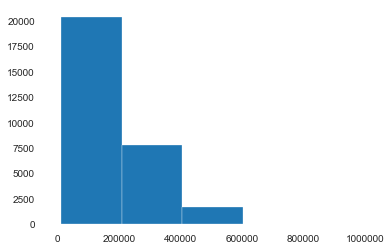

In [10]:
plt.hist(credit1['LIMIT_BAL'], bins=5)

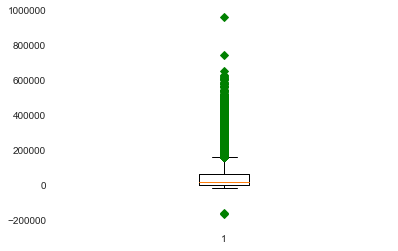

In [11]:
A = credit1['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [12]:
corrMat = credit1.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

In [13]:
covMat = credit1.cov()
print(covMat)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_0                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                   2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                   2.570130e+09 -1085.595467   1054.657595   
BILL_A

### EDA

In [14]:
credit1.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


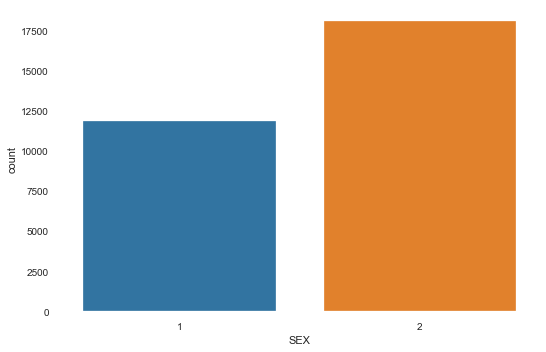

In [15]:
sns.factorplot('SEX',data=credit1,kind='count',aspect=1.5)

In [16]:
#Default next month and gender
credit1.groupby(['SEX','default_payment_next_month'])['default_payment_next_month'].count()

SEX  default_payment_next_month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: default_payment_next_month, dtype: int64

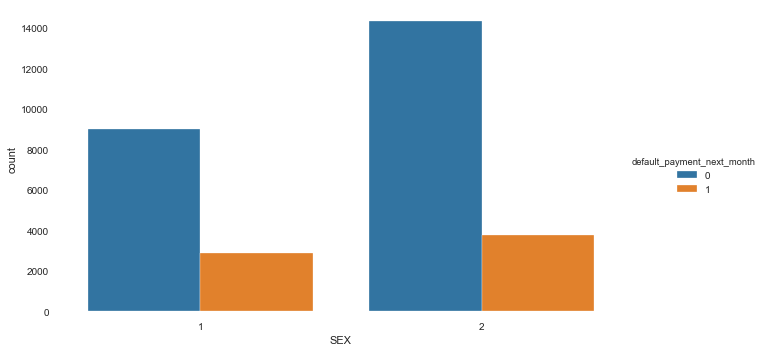

In [17]:
#Default next month and gender chart
defaultgender = sns.factorplot('SEX', data=credit1, hue='default_payment_next_month', kind='count', aspect=1.75)
defaultgender.set_xlabels('SEX')

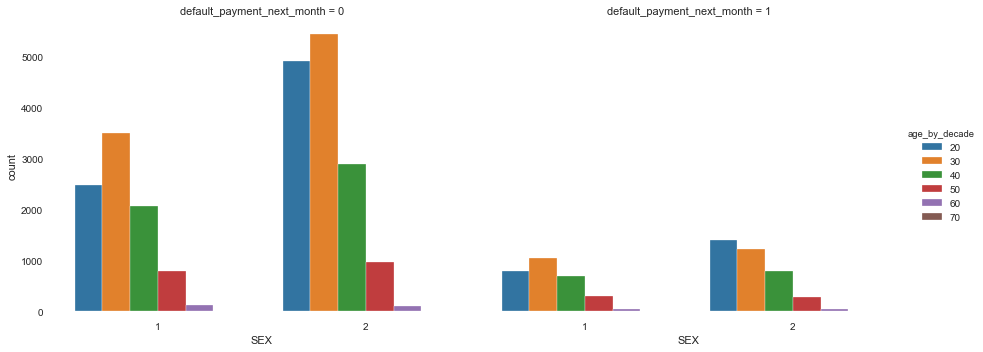

In [18]:
sns.factorplot('SEX',data=credit1, kind='count', hue='age_by_decade',col='default_payment_next_month',aspect=1.25, height=5)

In [19]:
credit1.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

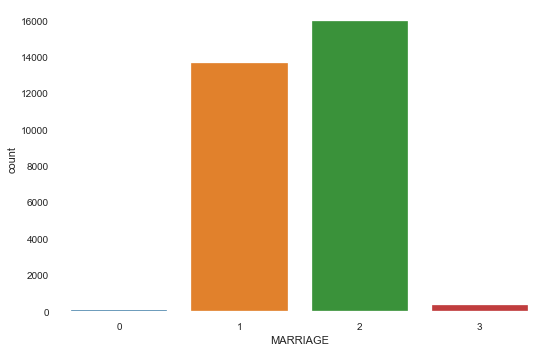

In [20]:
sns.factorplot('MARRIAGE',data=credit1,kind='count',aspect=1.5)

In [21]:
#Default next month and marriage
credit1.groupby(['MARRIAGE','default_payment_next_month'])['default_payment_next_month'].count()

MARRIAGE  default_payment_next_month
0         0                                49
          1                                 5
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               239
          1                                84
Name: default_payment_next_month, dtype: int64

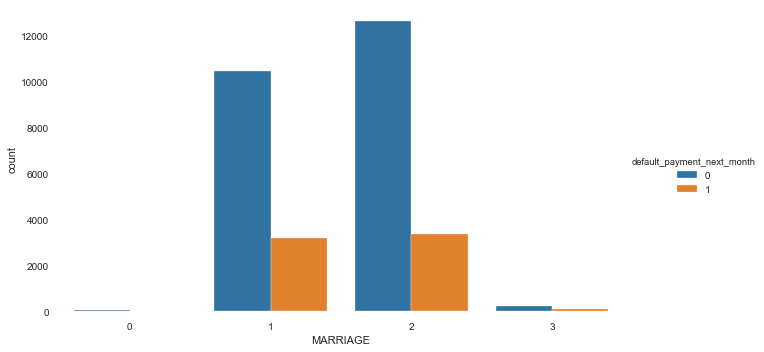

In [22]:
#Default next month and marriage chart
defaultgender = sns.factorplot('MARRIAGE', data=credit1, hue='default_payment_next_month', kind='count', aspect=1.75)
defaultgender.set_xlabels('MARRIAGE')

In [23]:
credit1.groupby('age_by_decade')['age_by_decade'].count()

age_by_decade
20     9618
30    11238
40     6464
50     2341
60      314
70       25
Name: age_by_decade, dtype: int64

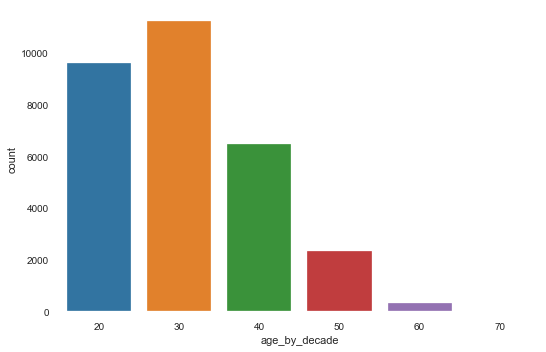

In [24]:
sns.factorplot('age_by_decade',data=credit1,kind='count',aspect=1.5)

In [25]:
#Default next month and age by decade
credit1.groupby(['age_by_decade','default_payment_next_month'])['default_payment_next_month'].count()

age_by_decade  default_payment_next_month
20             0                             7421
               1                             2197
30             0                             8962
               1                             2276
40             0                             4979
               1                             1485
50             0                             1759
               1                              582
60             0                              225
               1                               89
70             0                               18
               1                                7
Name: default_payment_next_month, dtype: int64

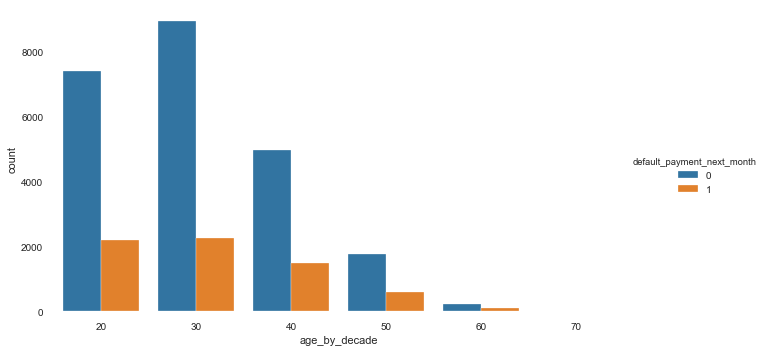

In [26]:
#Default next month and age chart
defaultgender = sns.factorplot('age_by_decade', data=credit1, hue='default_payment_next_month', kind='count', aspect=1.75)
defaultgender.set_xlabels('age_by_decade')

In [27]:
credit1.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

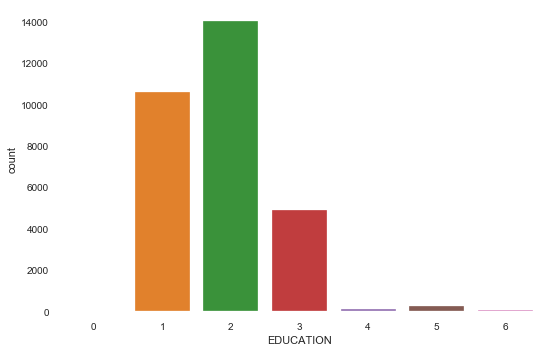

In [28]:
sns.factorplot('EDUCATION',data=credit1,kind='count',aspect=1.5)

In [29]:
#Default next month and education
credit1.groupby(['EDUCATION','default_payment_next_month'])['default_payment_next_month'].count()

EDUCATION  default_payment_next_month
0          0                                14
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               116
           1                                 7
5          0                               262
           1                                18
6          0                                43
           1                                 8
Name: default_payment_next_month, dtype: int64

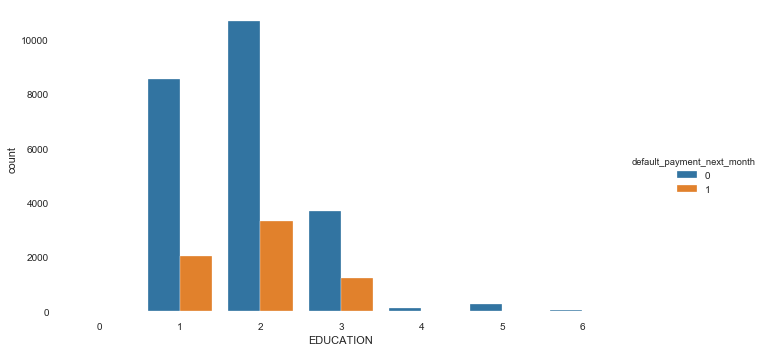

In [30]:
#Default next month and education chart
defaultgender = sns.factorplot('EDUCATION', data=credit1, hue='default_payment_next_month', kind='count', aspect=1.75)
defaultgender.set_xlabels('EDUCATION')

In [31]:
credit1.groupby('limit_bal_gp')['limit_bal_gp'].count()

limit_bal_gp
10000      18850
200000      6033
300000      3042
400000      1147
500000       833
600000        64
700000        28
800000         2
1000000        1
Name: limit_bal_gp, dtype: int64

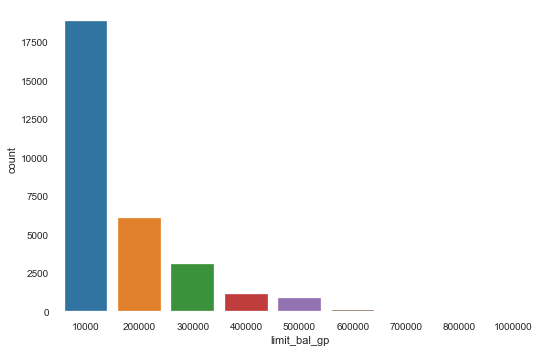

In [32]:
sns.factorplot('limit_bal_gp',data=credit1,kind='count',aspect=1.5)

In [33]:
#Default next month and limit bal gp
credit1.groupby(['limit_bal_gp','default_payment_next_month'])['default_payment_next_month'].count()

limit_bal_gp  default_payment_next_month
10000         0                             13901
              1                              4949
200000        0                              5046
              1                               987
300000        0                              2590
              1                               452
400000        0                              1003
              1                               144
500000        0                               738
              1                                95
600000        0                                58
              1                                 6
700000        0                                25
              1                                 3
800000        0                                 2
1000000       0                                 1
Name: default_payment_next_month, dtype: int64

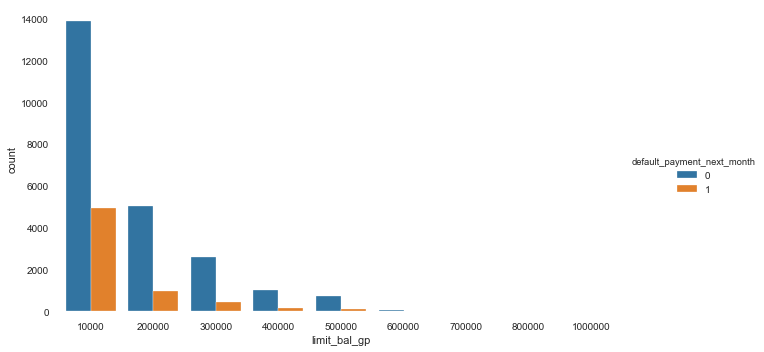

In [34]:
#Default next month and limit bal gp chart
defaultgender = sns.factorplot('limit_bal_gp', data=credit1, hue='default_payment_next_month', kind='count', aspect=1.75)
defaultgender.set_xlabels('limit_bal_gp')

##### Define those whose default

In [35]:
default_clients = credit1[credit1['default_payment_next_month']==1]

In [36]:
len(default_clients)

6636

#### Client who default group by different attributes

In [37]:
credit1.pivot_table('default_payment_next_month','SEX','age_by_decade',aggfunc=np.sum,margins=True)

age_by_decade,20,30,40,50,60,70,All
SEX,,,,,,,
1,789,1050,691,295,44,4,2873
2,1408,1226,794,287,45,3,3763
All,2197,2276,1485,582,89,7,6636


In [38]:
credit1.pivot_table('default_payment_next_month','SEX','EDUCATION',aggfunc=np.sum,margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,0,906,1408,545,4,6,4,2873
2,0,1130,1922,692,3,12,4,3763
All,0,2036,3330,1237,7,18,8,6636


###### Payment Status factor - Payment status in Sep

In [39]:
credit1.pivot_table('default_payment_next_month','SEX','PAY_0',aggfunc=np.sum,margins=True)

PAY_0,-2,-1,0,1,2,3,4,5,6,7,8,All
SEX,,,,,,,,,,,,
1,113,390,864,566,768,120,32,7,4,4,5,2873
2,252,564,1024,686,1076,124,20,6,2,3,6,3763
All,365,954,1888,1252,1844,244,52,13,6,7,11,6636


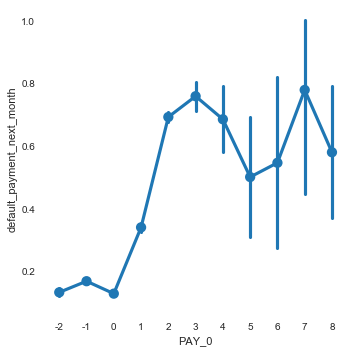

In [40]:
sns.factorplot('PAY_0','default_payment_next_month', data=credit1)

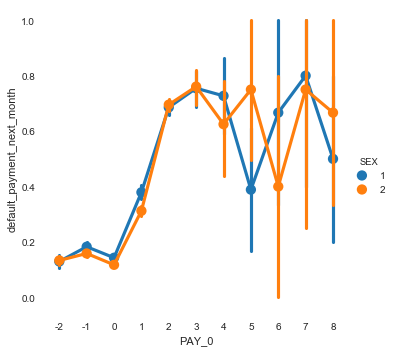

In [41]:
sns.factorplot('PAY_0','default_payment_next_month', hue='SEX', data=credit1)

###### Payment Status factor - Payment status in Aug

In [42]:
credit1.pivot_table('default_payment_next_month','SEX','PAY_2',aggfunc=np.sum,margins=True)

PAY_2,-2,-1,0,1,2,3,4,5,6,7,8,All
SEX,,,,,,,,,,,,
1,246.0,379.0,1132.0,1.0,970.0,95.0,31.0,8.0,5.0,6.0,NaN,2873
2,445.0,587.0,1371.0,4.0,1214.0,106.0,19.0,7.0,4.0,6.0,0.0,3763
All,691.0,966.0,2503.0,5.0,2184.0,201.0,50.0,15.0,9.0,12.0,0.0,6636


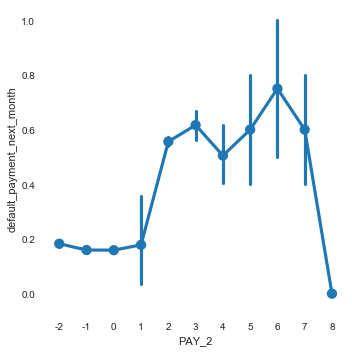

In [43]:
sns.factorplot('PAY_2','default_payment_next_month', data=credit1)

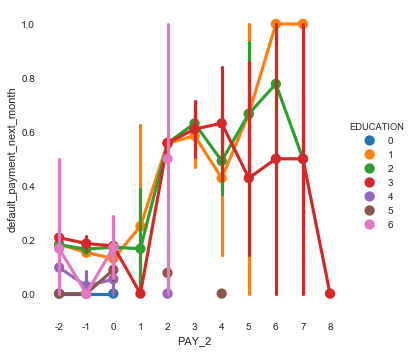

In [44]:
sns.factorplot('PAY_2','default_payment_next_month', hue='EDUCATION', data=credit1)

In [45]:
credit1.pivot_table('default_payment_next_month','SEX','PAY_2',aggfunc=np.sum,margins=True)

PAY_2,-2,-1,0,1,2,3,4,5,6,7,8,All
SEX,,,,,,,,,,,,
1,246.0,379.0,1132.0,1.0,970.0,95.0,31.0,8.0,5.0,6.0,NaN,2873
2,445.0,587.0,1371.0,4.0,1214.0,106.0,19.0,7.0,4.0,6.0,0.0,3763
All,691.0,966.0,2503.0,5.0,2184.0,201.0,50.0,15.0,9.0,12.0,0.0,6636


###### Payment Status factor - Payment status in Jul

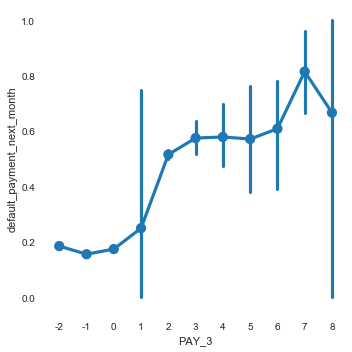

In [46]:
sns.factorplot('PAY_3','default_payment_next_month', data=credit1)

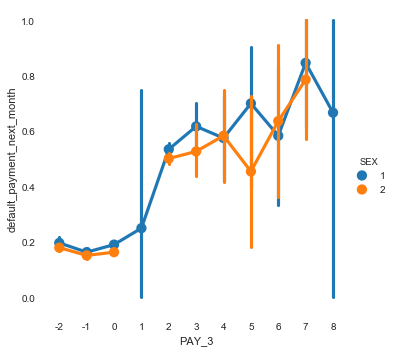

In [47]:
sns.factorplot('PAY_3','default_payment_next_month', hue='SEX', data=credit1)

In [48]:
credit1.pivot_table('default_payment_next_month','SEX','PAY_3',aggfunc=np.sum,margins=True)

PAY_3,-2,-1,0,1,2,3,4,5,6,7,8,All
SEX,,,,,,,,,,,,
1,266.0,360.0,1233.0,1.0,884.0,79.0,23.0,7.0,7.0,11.0,2.0,2873
2,491.0,566.0,1518.0,NaN,1085.0,59.0,21.0,5.0,7.0,11.0,NaN,3763
All,757.0,926.0,2751.0,1.0,1969.0,138.0,44.0,12.0,14.0,22.0,2.0,6636


###### Payment Status factor - Payment status in Jun

In [49]:
credit1.pivot_table('default_payment_next_month','SEX','PAY_4',aggfunc=np.sum,margins=True)

PAY_4,-2,-1,0,1,2,3,4,5,6,7,8,All
SEX,,,,,,,,,,,,
1,314.0,347.0,1365.0,1.0,716.0,66.0,26.0,9.0,2.0,26.0,1.0,2873
2,523.0,557.0,1651.0,NaN,937.0,44.0,20.0,9.0,0.0,22.0,NaN,3763
All,837.0,904.0,3016.0,1.0,1653.0,110.0,46.0,18.0,2.0,48.0,1.0,6636


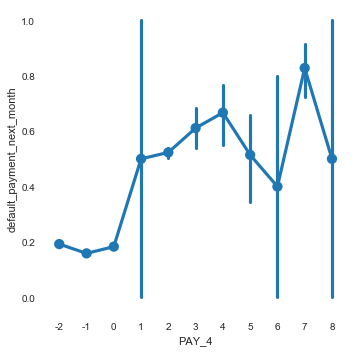

In [50]:
sns.factorplot('PAY_4','default_payment_next_month', data=credit1)

######  Payment Status factor -  Payment status in May

In [51]:
credit1.pivot_table('default_payment_next_month','SEX','PAY_5',aggfunc=np.sum,margins=True)

PAY_5,-2,-1,0,2,3,4,5,6,7,8,All
SEX,,,,,,,,,,,
1,344.0,344.0,1429.0,630.0,63.0,26.0,7.0,3.0,26.0,1.0,2873
2,551.0,553.0,1766.0,793.0,50.0,25.0,3.0,NaN,22.0,NaN,3763
All,895.0,897.0,3195.0,1423.0,113.0,51.0,10.0,3.0,48.0,1.0,6636


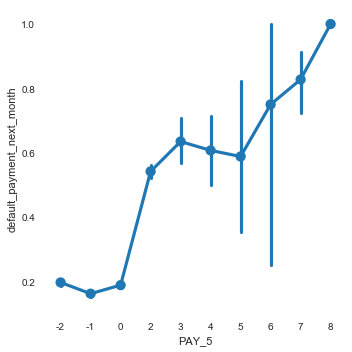

In [52]:
sns.factorplot('PAY_5','default_payment_next_month', data=credit1)

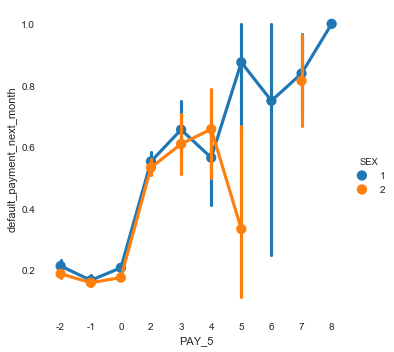

In [53]:
sns.factorplot('PAY_5','default_payment_next_month', hue='SEX', data=credit1)

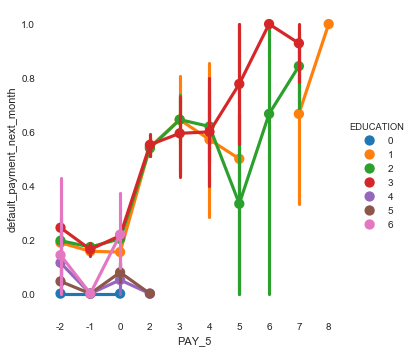

In [54]:
sns.factorplot('PAY_5','default_payment_next_month', hue='EDUCATION', data=credit1)

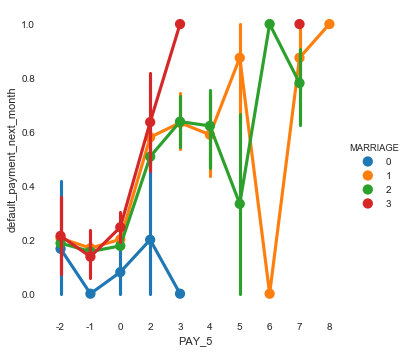

In [55]:
sns.factorplot('PAY_5','default_payment_next_month', hue='MARRIAGE', data=credit1)

###### Payment Status factor - Payment status in Apr

In [56]:
credit1.pivot_table('default_payment_next_month','SEX','PAY_6',aggfunc=np.sum,margins=True)

PAY_6,-2,-1,0,2,3,4,5,6,7,8,All
SEX,,,,,,,,,,,
1,400.0,383.0,1353.0,620.0,64.0,18.0,4.0,9.0,20.0,2.0,2873
2,581.0,592.0,1716.0,781.0,54.0,13.0,3.0,5.0,18.0,NaN,3763
All,981.0,975.0,3069.0,1401.0,118.0,31.0,7.0,14.0,38.0,2.0,6636


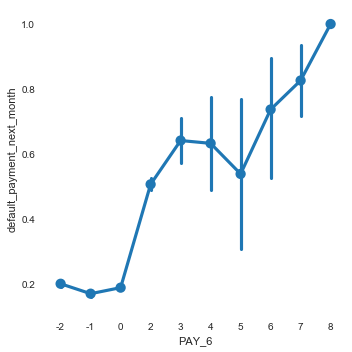

In [57]:
sns.factorplot('PAY_6','default_payment_next_month', data=credit1)

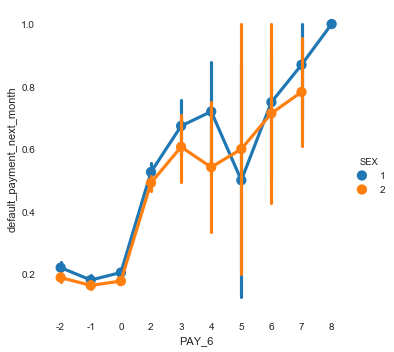

In [58]:
sns.factorplot('PAY_6','default_payment_next_month', hue='SEX', data=credit1)

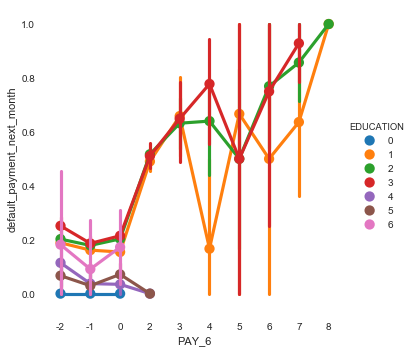

In [59]:
sns.factorplot('PAY_6','default_payment_next_month', hue='EDUCATION', data=credit1)

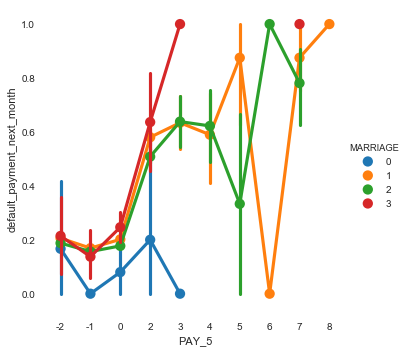

In [60]:
sns.factorplot('PAY_5','default_payment_next_month', hue='MARRIAGE', data=credit1)

##### age factor

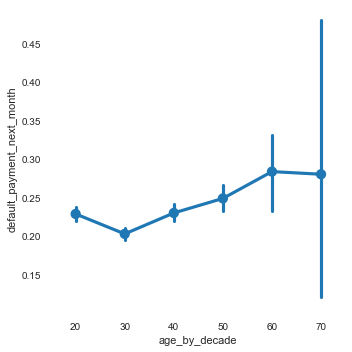

In [61]:
sns.factorplot('age_by_decade','default_payment_next_month', data=credit1)

##### limit bal factor

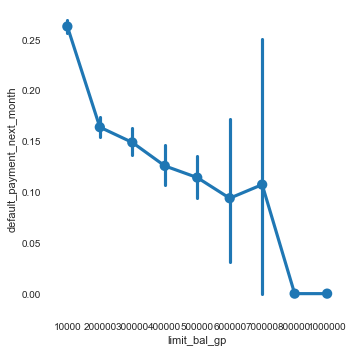

In [62]:
sns.factorplot('limit_bal_gp','default_payment_next_month', data=credit1)

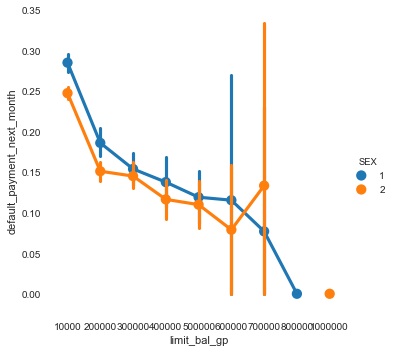

In [63]:
sns.factorplot('limit_bal_gp','default_payment_next_month', hue='SEX', data=credit1)

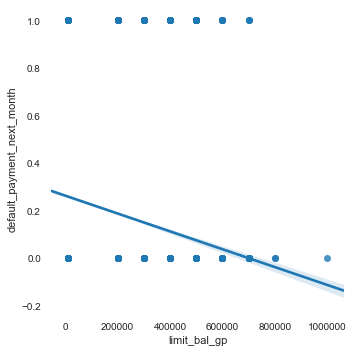

In [64]:
#linear plot default (1) vs limit bal gp
sns.lmplot('limit_bal_gp','default_payment_next_month', data=credit1)

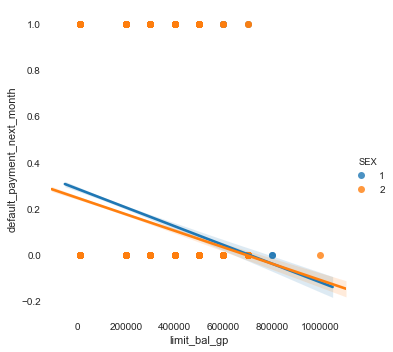

In [65]:
#linear plot default (1) vs limit bal gp by sex
sns.lmplot('limit_bal_gp', 'default_payment_next_month', hue='SEX', data=credit1)

##### age factor

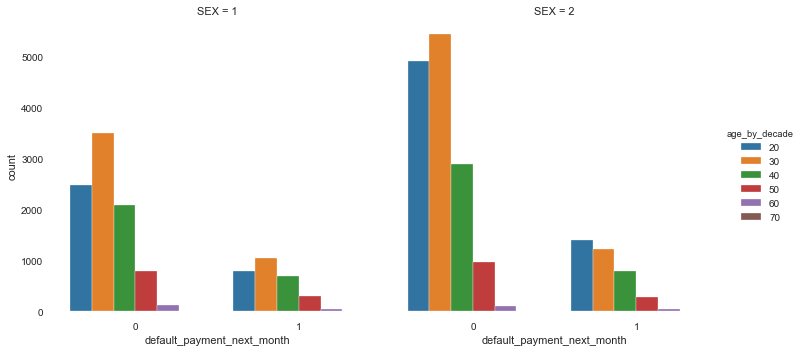

In [66]:
sns.factorplot('default_payment_next_month', data=credit1, hue='age_by_decade', kind='count', 
               col='SEX')

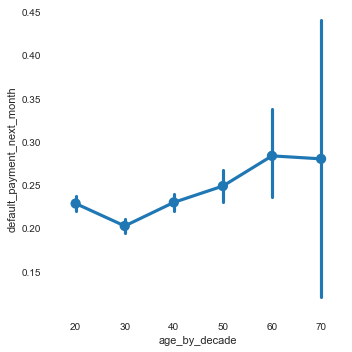

In [67]:
sns.factorplot('age_by_decade','default_payment_next_month', data=credit1)

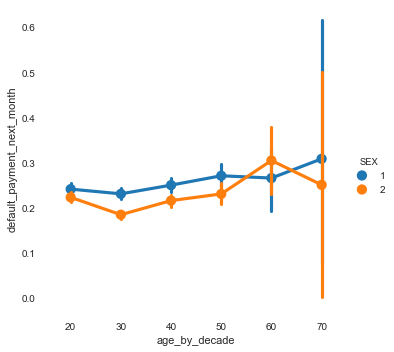

In [68]:
sns.factorplot('age_by_decade','default_payment_next_month', hue='SEX', data=credit1)

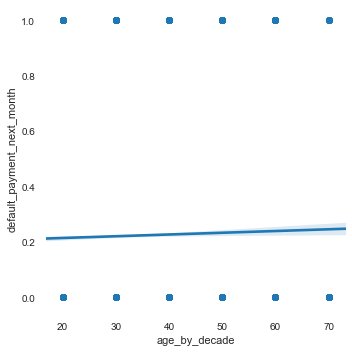

In [69]:
#linear plot default (1) vs age
sns.lmplot('age_by_decade','default_payment_next_month', data=credit1)

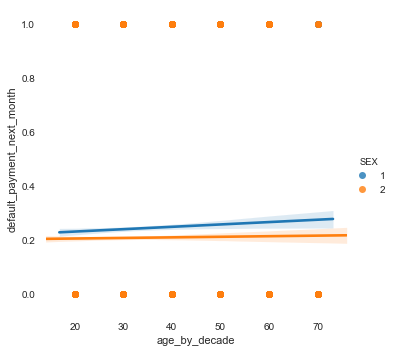

In [70]:
#linear plot default (1) vs age by sex
sns.lmplot('age_by_decade','default_payment_next_month', hue='SEX', data=credit1)

##### Education factor

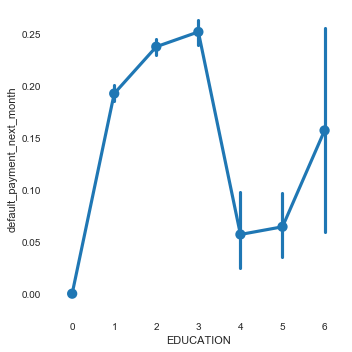

In [71]:
sns.factorplot('EDUCATION','default_payment_next_month', data=credit1)

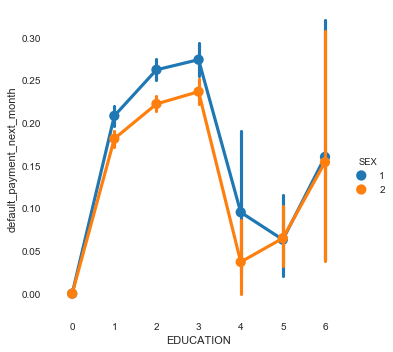

In [72]:
sns.factorplot('EDUCATION','default_payment_next_month', hue='SEX', data=credit1)

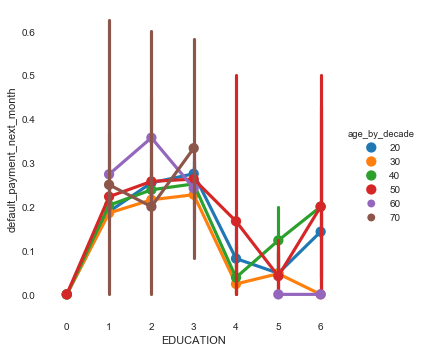

In [73]:
sns.factorplot('EDUCATION','default_payment_next_month', hue='age_by_decade', data=credit1)

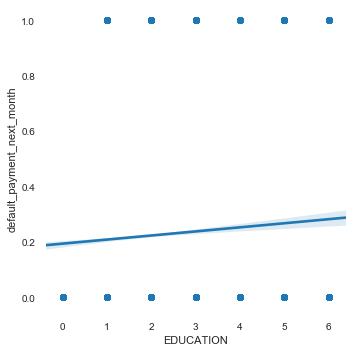

In [74]:
#linear plot default (1) vs edu
sns.lmplot('EDUCATION','default_payment_next_month', data=credit1)

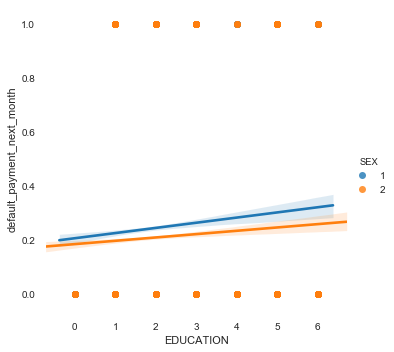

In [75]:
#linear plot default (1) vs edu by sex
sns.lmplot('EDUCATION','default_payment_next_month', hue='SEX', data=credit1)

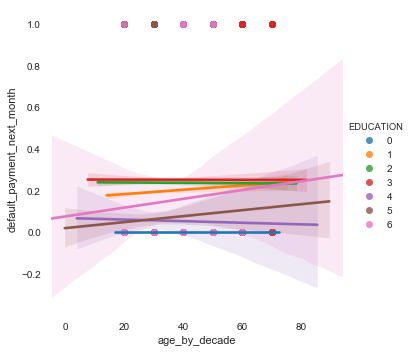

In [76]:
#linear plot default (1) vs edu by age
sns.lmplot('age_by_decade','default_payment_next_month', hue='EDUCATION', data=credit1)

##### marriage factor

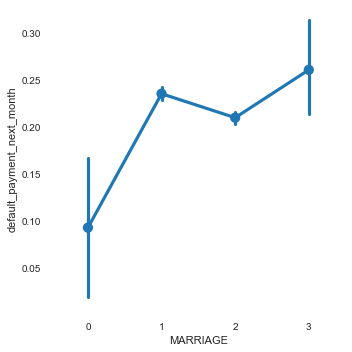

In [77]:
sns.factorplot('MARRIAGE','default_payment_next_month', data=credit1)

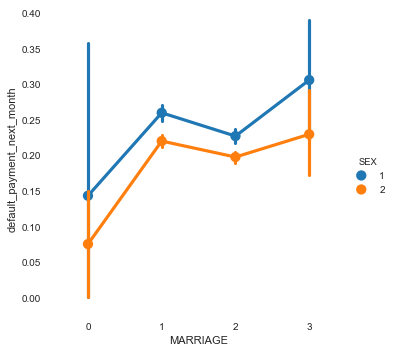

In [78]:
sns.factorplot('MARRIAGE','default_payment_next_month', hue='SEX', data=credit1)

### Those who use revolving credit or payment delay for 2 months are likely will be default next month. Portion of female is slightly higher

In [79]:
table1 = pd.crosstab(index=[credit1.default_payment_next_month,credit1.age_by_decade], columns=[credit1.EDUCATION, credit1.SEX])

In [80]:
table1

EDUCATION                                 0        1           2          3  \
SEX                                       1  2     1     2     1     2    1   
default_payment_next_month age_by_decade                                      
0                          20             1  0   956  2044  1220  2382  268   
                           30             4  3  1498  2132  1565  2574  403   
                           40             3  2   705   718   862  1393  469   
                           50             0  1   241   188   281   356  262   
                           60             0  0    43    18    35    28   42   
                           70             0  0     5     1     3     1    1   
1                          20             0  0   226   472   445   784  116   
                           30             0  0   384   443   512   626  151   
                           40             0  0   201   162   323   383  162   
                           50             0  0    80    43   108   113  103   
                           60             0  0    13    10    20    15   11   
                           70             0  0     2     0     0     1    2   

EDUCATION                                       4       5      6      
SEX                                         2   1   2   1   2  1   2  
default_payment_next_month age_by_decade                              
0                          20             420  17  28  26  53  4   2  
                           30             634  10  31  32  69  3   4  
                           40             725   9  16  24  33  8  12  
                           50             394   2   3   7  16  4   4  
                           60              55   0   0   0   2  2   0  
                           70               7   0   0   0   0  0   0  
1                          20             145   2   2   0   4  0   1  
                           30             154   1   0   2   3  0   0  
                           40             240   0   1   3   5  2   3  
                           50             131   1   0   1   0  2   0  
                           60              20   0   0   0   0  0   0  
                           70               2   0   0   0   0  0   0

In [82]:
table1.columns, table1.index

(MultiIndex([(0, 1),
             (0, 2),
             (1, 1),
             (1, 2),
             (2, 1),
             (2, 2),
             (3, 1),
             (3, 2),
             (4, 1),
             (4, 2),
             (5, 1),
             (5, 2),
             (6, 1),
             (6, 2)],
            names=['EDUCATION', 'SEX']), MultiIndex([(0, 20),
             (0, 30),
             (0, 40),
             (0, 50),
             (0, 60),
             (0, 70),
             (1, 20),
             (1, 30),
             (1, 40),
             (1, 50),
             (1, 60),
             (1, 70)],
            names=['default_payment_next_month', 'age_by_decade']))

In [83]:
#Change column name
table1.columns.set_levels(['other0','Grad school','university','high school','other4','other5','other6'], level=0, inplace=True)
table1.columns.set_levels(['Male','Female'], level=1, inplace=True)
table1.index.set_levels(['not default next month','default next month'], level=0,inplace=True)
table1

EDUCATION                                other0        Grad school         \
SEX                                        Male Female        Male Female   
default_payment_next_month age_by_decade                                    
not default next month     20                 1      0         956   2044   
                           30                 4      3        1498   2132   
                           40                 3      2         705    718   
                           50                 0      1         241    188   
                           60                 0      0          43     18   
                           70                 0      0           5      1   
default next month         20                 0      0         226    472   
                           30                 0      0         384    443   
                           40                 0      0         201    162   
                           50                 0      0          80     43   
                           60                 0      0          13     10   
                           70                 0      0           2      0   

EDUCATION                                university        high school         \
SEX                                            Male Female        Male Female   
default_payment_next_month age_by_decade                                        
not default next month     20                  1220   2382         268    420   
                           30                  1565   2574         403    634   
                           40                   862   1393         469    725   
                           50                   281    356         262    394   
                           60                    35     28          42     55   
                           70                     3      1           1      7   
default next month         20                   445    784         116    145   
                           30                   512    626         151    154   
                           40                   323    383         162    240   
                           50                   108    113         103    131   
                           60                    20     15          11     20   
                           70                     0      1           2      2   

EDUCATION                                other4        other5        other6  \
SEX                                        Male Female   Male Female   Male   
default_payment_next_month age_by_decade                                      
not default next month     20                17     28     26     53      4   
                           30                10     31     32     69      3   
                           40                 9     16     24     33      8   
                           50                 2      3      7     16      4   
                           60                 0      0      0      2      2   
                           70                 0      0      0      0      0   
default next month         20                 2      2      0      4      0   
                           30                 1      0      2      3      0   
                           40                 0      1      3      5      2   
                           50                 1      0      1      0      2   
                           60                 0      0      0      0      0   
                           70                 0      0      0      0      0   

EDUCATION                                        
SEX                                      Female  
default_payment_next_month age_by_decade         
not default next month     20                 2  
                           30                 4  
                           40                12  
                           50                 4  
                           60                 0  
                           70             

In [84]:
table2 = pd.crosstab(index=[credit1.default_payment_next_month,credit1.limit_bal_gp], columns=[credit1.EDUCATION, credit1.SEX])

In [85]:
table2

EDUCATION                                0        1           2           3  \
SEX                                      1  2     1     2     1     2     1   
default_payment_next_month limit_bal_gp                                       
0                          10000         3  1  1499  2328  2780  4325  1067   
                           200000        4  4   881  1477   638  1386   205   
                           300000        1  1   563   752   330   644   110   
                           400000        0  0   265   290   121   227    32   
                           500000        0  0   220   228    84   138    27   
                           600000        0  0    15    19     6     9     2   
                           700000        0  0     4     6     6     5     2   
                           800000        0  0     1     0     1     0     0   
                           1000000       0  0     0     1     0     0     0   
1                          10000         0  0   523   683  1163  1506   471   
                           200000        0  0   199   249   156   270    46   
                           300000        0  0   110   132    60    96    15   
                           400000        0  0    38    36    22    33     8   
                           500000        0  0    33    28     6    14     5   
                           600000        0  0     2     2     1     1     0   
                           700000        0  0     1     0     0     2     0   

EDUCATION                                       4       5        6      
SEX                                         2   1   2   1    2   1   2  
default_payment_next_month limit_bal_gp                                 
0                          10000         1656  21  30  59  102  14  16  
                           200000         341  10  30  19   45   2   4  
                           300000         147   3  12   7   16   3   1  
                           400000          52   4   1   3    6   1   1  
                           500000          31   0   4   1    4   1   0  
                           600000           7   0   0   0    0   0   0  
                           700000           1   0   1   0    0   0   0  
                           800000           0   0   0   0    0   0   0  
                           1000000          0   0   0   0    0   0   0  
1                          10000          577   4   2   5    8   3   4  
                           200000          61   0   1   0    4   1   0  
                           300000          39   0   0   0    0   0   0  
                           400000           7   0   0   0    0   0   0  
                           500000           8   0   0   1    0   0   0  
                           600000           0   0   0   0    0   0   0  
                           700000           0   0   0   0    0   0   0

In [86]:
#Change column name
table2.columns.set_levels(['other0','Grad school','university','high school','other4','other5','other6'], level=0, inplace=True)
table2.columns.set_levels(['Male','Female'], level=1, inplace=True)
table2.index.set_levels(['not default next month','default next month'], level=0,inplace=True)
table2

EDUCATION                               other0        Grad school         \
SEX                                       Male Female        Male Female   
default_payment_next_month limit_bal_gp                                    
not default next month     10000             3      1        1499   2328   
                           200000            4      4         881   1477   
                           300000            1      1         563    752   
                           400000            0      0         265    290   
                           500000            0      0         220    228   
                           600000            0      0          15     19   
                           700000            0      0           4      6   
                           800000            0      0           1      0   
                           1000000           0      0           0      1   
default next month         10000             0      0         523    683   
                           200000            0      0         199    249   
                           300000            0      0         110    132   
                           400000            0      0          38     36   
                           500000            0      0          33     28   
                           600000            0      0           2      2   
                           700000            0      0           1      0   

EDUCATION                               university        high school         \
SEX                                           Male Female        Male Female   
default_payment_next_month limit_bal_gp                                        
not default next month     10000              2780   4325        1067   1656   
                           200000              638   1386         205    341   
                           300000              330    644         110    147   
                           400000              121    227          32     52   
                           500000               84    138          27     31   
                           600000                6      9           2      7   
                           700000                6      5           2      1   
                           800000                1      0           0      0   
                           1000000               0      0           0      0   
default next month         10000              1163   1506         471    577   
                           200000              156    270          46     61   
                           300000               60     96          15     39   
                           400000               22     33           8      7   
                           500000                6     14           5      8   
                           600000                1      1           0      0   
                           700000                0      2           0      0   

EDUCATION                               other4        other5        other6  \
SEX                                       Male Female   Male Female   Male   
default_payment_next_month limit_bal_gp                                      
not default next month     10000            21     30     59    102     14   
                           200000           10     30     19     45      2   
                           300000            3     12      7     16      3   
                           400000            4      1      3      6      1   
                           500000            0      4      1      4      1   
                           600000            0      0      0      0      0   
                           700000            0      1      0      0      0   
                           800000            0      0      0      0      0   
                           1000000           0      0      0      0      0   
default next month         10000             4      2      5      8      3   
                    

In [87]:
table3 = pd.crosstab(index=[credit1.default_payment_next_month,credit1.limit_bal_gp], columns=[credit1.MARRIAGE, credit1.SEX])

In [88]:
table3

MARRIAGE                                 0         1           2         3  \
SEX                                      1   2     1     2     1     2   1   
default_payment_next_month limit_bal_gp                                      
0                          10000         8  25  1953  3699  3408  4612  74   
                           200000        2  11   873  1595   872  1667  12   
                           300000        2   1   559   790   454   772   2   
                           400000        0   0   244   290   180   285   2   
                           500000        0   0   197   216   135   189   1   
                           600000        0   0     7    12    16    23   0   
                           700000        0   0    10     6     2     7   0   
                           800000        0   0     1     0     1     0   0   
                           1000000       0   0     0     1     0     0   0   
1                          10000         2   3   920  1330  1212  1405  35   
                           200000        0   0   230   334   169   249   3   
                           300000        0   0   113   128    71   139   1   
                           400000        0   0    45    39    23    37   0   
                           500000        0   0    34    26    10    24   1   
                           600000        0   0     3     1     0     2   0   
                           700000        0   0     1     2     0     0   0   

MARRIAGE                                      
SEX                                        2  
default_payment_next_month limit_bal_gp       
0                          10000         122  
                           200000         14  
                           300000         10  
                           400000          2  
                           500000          0  
                           600000          0  
                           700000          0  
                           800000          0  
                           1000000         0  
1                          10000          42  
                           200000          2  
                           300000          0  
                           400000          0  
                           500000          0  
                           600000          0  
                           700000          0

In [89]:
#Change column name
table3.columns.set_levels(['others','married','single','divorce'], level=0, inplace=True)
table3.columns.set_levels(['Male','Female'], level=1, inplace=True)
table3.index.set_levels(['not default next month','default next month'], level=0,inplace=True)
table3

MARRIAGE                                others        married        single  \
SEX                                       Male Female    Male Female   Male   
default_payment_next_month limit_bal_gp                                       
not default next month     10000             8     25    1953   3699   3408   
                           200000            2     11     873   1595    872   
                           300000            2      1     559    790    454   
                           400000            0      0     244    290    180   
                           500000            0      0     197    216    135   
                           600000            0      0       7     12     16   
                           700000            0      0      10      6      2   
                           800000            0      0       1      0      1   
                           1000000           0      0       0      1      0   
default next month         10000             2      3     920   1330   1212   
                           200000            0      0     230    334    169   
                           300000            0      0     113    128     71   
                           400000            0      0      45     39     23   
                           500000            0      0      34     26     10   
                           600000            0      0       3      1      0   
                           700000            0      0       1      2      0   

MARRIAGE                                       divorce         
SEX                                     Female    Male Female  
default_payment_next_month limit_bal_gp                        
not default next month     10000          4612      74    122  
                           200000         1667      12     14  
                           300000          772       2     10  
                           400000          285       2      2  
                           500000          189       1      0  
                           600000           23       0      0  
                           700000            7       0      0  
                           800000            0       0      0  
                           1000000           0       0      0  
default next month         10000          1405      35     42  
                           200000          249       3      2  
                           300000          139       1      0  
                           400000           37       0      0  
                           500000           24       1      0  
                           600000            2       0      0  
                           700000            0       0      0

In [90]:
table4 = pd.crosstab(index=[credit1.default_payment_next_month,credit1.age_by_decade], columns=[credit1.MARRIAGE, credit1.SEX])

In [91]:
table4

MARRIAGE                                  0         1           2         3  \
SEX                                       1   2     1     2     1     2   1   
default_payment_next_month age_by_decade                                      
0                          20             2   6   222   873  2260  4034   8   
                           30             5  17  1451  2855  2036  2536  23   
                           40             2  10  1470  2105   570   721  38   
                           50             3   4   598   682   176   250  20   
                           60             0   0    94    87    26    12   2   
                           70             0   0     9     7     0     2   0   
1                          20             2   0    80   307   703  1095   4   
                           30             0   0   493   717   552   500   5   
                           40             0   3   493   584   178   193  20   
                           50             0   0   236   216    48    57  11   
                           60             0   0    40    33     4    11   0   
                           70             0   0     4     3     0     0   0   

MARRIAGE                                      
SEX                                        2  
default_payment_next_month age_by_decade      
0                          20             16  
                           30             39  
                           40             63  
                           50             26  
                           60              4  
                           70              0  
1                          20              6  
                           30              9  
                           40             14  
                           50             14  
                           60              1  
                           70              0

In [92]:
#Change column name
table4.columns.set_levels(['others','married','single','divorce'], level=0, inplace=True)
table4.columns.set_levels(['Male','Female'], level=1, inplace=True)
table4.index.set_levels(['not default next month','default next month'], level=0,inplace=True)
table4

MARRIAGE                                 others        married        single  \
SEX                                        Male Female    Male Female   Male   
default_payment_next_month age_by_decade                                       
not default next month     20                 2      6     222    873   2260   
                           30                 5     17    1451   2855   2036   
                           40                 2     10    1470   2105    570   
                           50                 3      4     598    682    176   
                           60                 0      0      94     87     26   
                           70                 0      0       9      7      0   
default next month         20                 2      0      80    307    703   
                           30                 0      0     493    717    552   
                           40                 0      3     493    584    178   
                           50                 0      0     236    216     48   
                           60                 0      0      40     33      4   
                           70                 0      0       4      3      0   

MARRIAGE                                        divorce         
SEX                                      Female    Male Female  
default_payment_next_month age_by_decade                        
not default next month     20              4034       8     16  
                           30              2536      23     39  
                           40               721      38     63  
                           50               250      20     26  
                           60                12       2      4  
                           70                 2       0      0  
default next month         20              1095       4      6  
                           30               500       5      9  
                           40               193      20     14  
                           50                57      11     14  
                           60                11       0      1  
                           70                 0       0      0

In [93]:
table5 = pd.crosstab(index=[credit1.default_payment_next_month,credit1.limit_bal_gp], columns=[credit1.SEX, credit1.PAY_5])

In [94]:
table5

SEX                                        1                                \
PAY_5                                     -2   -1     0    2   3   4  5  6   
default_payment_next_month limit_bal_gp                                      
0                          10000         567  759  3643  418  33  17  1  0   
                           200000        340  460   899   58   0   2  0  0   
                           300000        233  284   480   19   0   0  0  1   
                           400000         76  104   238    8   0   0  0  0   
                           500000         46  106   175    5   0   1  0  0   
                           600000          4    2    16    1   0   0  0  0   
                           700000          3    2     7    0   0   0  0  0   
                           800000          0    1     1    0   0   0  0  0   
                           1000000         0    0     0    0   0   0  0  0   
1                          10000         174  205  1155  518  60  24  5  3   
                           200000         72   83   158   83   1   2  1  0   
                           300000         72   29    65   19   0   0  0  0   
                           400000         13   15    32    5   2   0  1  0   
                           500000         13   12    15    5   0   0  0  0   
                           600000          0    0     3    0   0   0  0  0   
                           700000          0    0     1    0   0   0  0  0   

SEX                                                2                           \
PAY_5                                     7  8    -2    -1     0    2   3   4   
default_payment_next_month limit_bal_gp                                         
0                          10000          5  0  1064  1461  5311  569  30  12   
                           200000         0  0   709   837  1654   84   2   1   
                           300000         0  0   383   374   783   33   0   0   
                           400000         0  0   126   164   283    4   0   0   
                           500000         0  0    89    78   234    4   0   0   
                           600000         0  0     7     7    21    0   0   0   
                           700000         0  0     4     3     6    0   0   0   
                           800000         0  0     0     0     0    0   0   0   
                           1000000        0  0     0     0     1    0   0   0   
1                          10000         24  1   276   316  1401  699  43  22   
                           200000         2  0   131   159   220   69   5   1   
                           300000         0  0   109    49    86   19   1   1   
                           400000         0  0    20    18    33    4   1   0   
                           500000         0  0    15     9    24    1   0   1   
                           600000         0  0     0     1     2    0   0   0   
                           700000         0  0     0     1     0    1   0   0   

SEX                                             
PAY_5                                    5   7  
default_payment_next_month limit_bal_gp         
0                          10000         6   5  
                           200000        0   0  
                           300000        0   0  
                           400000        0   0  
                           500000        0   0  
                           600000        0   0  
                           700000        0   0  
                           800000        0   0  
                           1000000       0   0  
1                          10000         3  20  
                           200000        0   0  
                           300000        0   2  
                           400000        0   0  
                           500000        0   0  
                           600000        0   0  
                           700000        0   0

In [95]:
#Change column name
table5.columns.set_levels(['Male','Female'], level=0, inplace=True)
table5.columns.set_levels(['no consumpt','paid in full','use credit','delay 1mth','delay 2mth', 'delay 3mth', 'delay 4mth', 'delay 5mth', 'delay 6mth','delay 7 mth'], level=1, inplace=True)
table5.index.set_levels(['not default next month','default next month'], level=0,inplace=True)
table5

SEX                                            Male                          \
PAY_5                                   no consumpt paid in full use credit   
default_payment_next_month limit_bal_gp                                       
not default next month     10000                567          759       3643   
                           200000               340          460        899   
                           300000               233          284        480   
                           400000                76          104        238   
                           500000                46          106        175   
                           600000                 4            2         16   
                           700000                 3            2          7   
                           800000                 0            1          1   
                           1000000                0            0          0   
default next month         10000                174          205       1155   
                           200000                72           83        158   
                           300000                72           29         65   
                           400000                13           15         32   
                           500000                13           12         15   
                           600000                 0            0          3   
                           700000                 0            0          1   

SEX                                                                       \
PAY_5                                   delay 1mth delay 2mth delay 3mth   
default_payment_next_month limit_bal_gp                                    
not default next month     10000               418         33         17   
                           200000               58          0          2   
                           300000               19          0          0   
                           400000                8          0          0   
                           500000                5          0          1   
                           600000                1          0          0   
                           700000                0          0          0   
                           800000                0          0          0   
                           1000000               0          0          0   
default next month         10000               518         60         24   
                           200000               83          1          2   
                           300000               19          0          0   
                           400000                5          2          0   
                           500000                5          0          0   
                           600000                0          0          0   
                           700000                0          0          0   

SEX                                                                       \
PAY_5                                   delay 4mth delay 5mth delay 6mth   
default_payment_next_month limit_bal_gp                                    
not default next month     10000                 1          0          5   
                           200000                0          0          0   
                           300000                0          1          0   
                           400000                0          0          0   
                           500000                0          0          0   
                           600000                0          0          0   
                           700000                0          0          0   
                           800000                0          0          0   
                           1000000               0          0          0   
default next month         10000                 5          3         24   
                           200000                1          0    

In [96]:
table6 = pd.crosstab(index=[credit1.default_payment_next_month,credit1.limit_bal_gp], columns=[credit1.SEX, credit1.PAY_6])

In [97]:
table6

SEX                                        1                                \
PAY_6                                     -2   -1     0    2   3   4  5  6   
default_payment_next_month limit_bal_gp                                      
0                          10000         680  782  3490  448  30   5  3  2   
                           200000        353  446   883   74   1   2  0  0   
                           300000        243  295   458   20   0   0  1  0   
                           400000         78  100   236   12   0   0  0  0   
                           500000         53  108   167    4   0   0  0  1   
                           600000          5    1    17    0   0   0  0  0   
                           700000          3    1     8    0   0   0  0  0   
                           800000          0    2     0    0   0   0  0  0   
                           1000000         0    0     0    0   0   0  0  0   
1                          10000         225  240  1088  507  62  16  3  8   
                           200000         72   86   155   83   1   2  0  1   
                           300000         74   31    62   18   0   0  0  0   
                           400000         15   16    30    5   1   0  1  0   
                           500000         14   10    14    7   0   0  0  0   
                           600000          0    0     3    0   0   0  0  0   
                           700000          0    0     1    0   0   0  0  0   

SEX                                                2                           \
PAY_6                                     7  8    -2    -1     0    2   3   4   
default_payment_next_month limit_bal_gp                                         
0                          10000          3  0  1171  1480  5088  673  28  10   
                           200000         0  0   727   847  1617   89   5   1   
                           300000         0  0   388   420   728   36   1   0   
                           400000         0  0   117   171   285    4   0   0   
                           500000         0  0    86   100   213    5   1   0   
                           600000         0  0     7     7    21    0   0   0   
                           700000         0  0     3     5     5    0   0   0   
                           800000         0  0     0     0     0    0   0   0   
                           1000000        0  0     0     0     1    0   0   0   
1                          10000         18  2   301   338  1362  696  46  13   
                           200000         2  0   139   164   215   63   4   0   
                           300000         0  0   105    58    82   18   2   0   
                           400000         0  0    20    21    30    4   1   0   
                           500000         0  0    16    10    23    0   1   0   
                           600000         0  0     0     0     3    0   0   0   
                           700000         0  0     0     1     1    0   0   0   

SEX                                                
PAY_6                                    5  6   7  
default_payment_next_month limit_bal_gp            
0                          10000         2  1   5  
                           200000        0  1   0  
                           300000        0  0   0  
                           400000        0  0   0  
                           500000        0  0   0  
                           600000        0  0   0  
                           700000        0  0   0  
                           800000        0  0   0  
                           1000000       0  0   0  
1                          10000         3  5  16  
                           200000        0  0   0  
                           300000        0  0   2  
                           400000        0  0   0  
                           500000        0  0   0  
                           600000        0  0   0  
                           700000        

In [98]:
#Change column name
table6.columns.set_levels(['Male','Female'], level=0, inplace=True)
table6.columns.set_levels(['no consumpt','paid in full','use credit','delay 1mth','delay 2mth', 'delay 3mth', 'delay 4mth', 'delay 5mth', 'delay 6mth','delay 7 mth'], level=1, inplace=True)
table6.index.set_levels(['not default next month','default next month'], level=0,inplace=True)
table6

SEX                                            Male                          \
PAY_6                                   no consumpt paid in full use credit   
default_payment_next_month limit_bal_gp                                       
not default next month     10000                680          782       3490   
                           200000               353          446        883   
                           300000               243          295        458   
                           400000                78          100        236   
                           500000                53          108        167   
                           600000                 5            1         17   
                           700000                 3            1          8   
                           800000                 0            2          0   
                           1000000                0            0          0   
default next month         10000                225          240       1088   
                           200000                72           86        155   
                           300000                74           31         62   
                           400000                15           16         30   
                           500000                14           10         14   
                           600000                 0            0          3   
                           700000                 0            0          1   

SEX                                                                       \
PAY_6                                   delay 1mth delay 2mth delay 3mth   
default_payment_next_month limit_bal_gp                                    
not default next month     10000               448         30          5   
                           200000               74          1          2   
                           300000               20          0          0   
                           400000               12          0          0   
                           500000                4          0          0   
                           600000                0          0          0   
                           700000                0          0          0   
                           800000                0          0          0   
                           1000000               0          0          0   
default next month         10000               507         62         16   
                           200000               83          1          2   
                           300000               18          0          0   
                           400000                5          1          0   
                           500000                7          0          0   
                           600000                0          0          0   
                           700000                0          0          0   

SEX                                                                       \
PAY_6                                   delay 4mth delay 5mth delay 6mth   
default_payment_next_month limit_bal_gp                                    
not default next month     10000                 3          2          3   
                           200000                0          0          0   
                           300000                1          0          0   
                           400000                0          0          0   
                           500000                0          1          0   
                           600000                0          0          0   
                           700000                0          0          0   
                           800000                0          0          0   
                           1000000               0          0          0   
default next month         10000                 3          8         18   
                           200000                0          1    

In [99]:
table7 = pd.crosstab(index=[credit1.default_payment_next_month,credit1.age_by_decade], columns=[credit1.SEX, credit1.PAY_5])
table7

SEX                                         1                                \
PAY_5                                      -2   -1     0    2   3   4  5  6   
default_payment_next_month age_by_decade                                      
0                          20             307  378  1622  165  10   9  0  0   
                           30             544  735  2024  196   7   5  1  1   
                           40             305  424  1229  108  11   1  0  0   
                           50              99  153   504   33   5   3  0  0   
                           60              14   27    72    7   0   2  0  0   
                           70               0    1     8    0   0   0  0  0   
1                          20              73   78   412  179  25  11  1  2   
                           30             131  132   513  235  16   8  2  1   
                           40              84  101   349  131  15   5  3  0   
                           50              44   25   139   74   6   2  1  0   
                           60              10    8    16    9   1   0  0  0   
                           70               2    0     0    2   0   0  0  0   

SEX                                                 2                       \
PAY_5                                      7  8    -2    -1     0    2   3   
default_payment_next_month age_by_decade                                     
0                          20              1  0   576   867  3158  305  10   
                           30              2  0  1033  1178  3001  222  11   
                           40              2  0   578   665  1533  114   4   
                           50              0  0   176   194   533   50   7   
                           60              0  0    17    18    63    3   0   
                           70              0  0     2     2     5    0   0   
1                          20              8  0   147   147   754  315  22   
                           30             12  0   220   239   508  242   8   
                           40              2  1   124   121   356  171  11   
                           50              4  0    46    39   127   60   9   
                           60              0  0    12     7    20    5   0   
                           70              0  0     2     0     1    0   0   

SEX                                                 
PAY_5                                      4  5  7  
default_payment_next_month age_by_decade            
0                          20              5  5  3  
                           30              1  1  0  
                           40              3  0  2  
                           50              2  0  0  
                           60              2  0  0  
                           70              0  0  0  
1                          20             14  1  8  
                           30              4  1  4  
                           40              6  1  4  
                           50              1  0  5  
                           60              0  0  1  
                           70              0  0  0

In [100]:
#Change column name
table7.columns.set_levels(['Male','Female'], level=0, inplace=True)
table7.columns.set_levels(['no consumpt','paid in full','use credit','delay 1mth','delay 2mth', 'delay 3mth', 'delay 4mth', 'delay 5mth', 'delay 6mth','delay 7 mth'], level=1, inplace=True)
table7.index.set_levels(['not default next month','default next month'], level=0,inplace=True)
table7

SEX                                             Male                          \
PAY_5                                    no consumpt paid in full use credit   
default_payment_next_month age_by_decade                                       
not default next month     20                    307          378       1622   
                           30                    544          735       2024   
                           40                    305          424       1229   
                           50                     99          153        504   
                           60                     14           27         72   
                           70                      0            1          8   
default next month         20                     73           78        412   
                           30                    131          132        513   
                           40                     84          101        349   
                           50                     44           25        139   
                           60                     10            8         16   
                           70                      2            0          0   

SEX                                                                        \
PAY_5                                    delay 1mth delay 2mth delay 3mth   
default_payment_next_month age_by_decade                                    
not default next month     20                   165         10          9   
                           30                   196          7          5   
                           40                   108         11          1   
                           50                    33          5          3   
                           60                     7          0          2   
                           70                     0          0          0   
default next month         20                   179         25         11   
                           30                   235         16          8   
                           40                   131         15          5   
                           50                    74          6          2   
                           60                     9          1          0   
                           70                     2          0          0   

SEX                                                                        \
PAY_5                                    delay 4mth delay 5mth delay 6mth   
default_payment_next_month age_by_decade                                    
not default next month     20                     0          0          1   
                           30                     1          1          2   
                           40                     0          0          2   
                           50                     0          0          0   
                           60                     0          0          0   
                           70                     0          0          0   
default next month         20                     1          2          8   
                           30                     2          1         12   
                           40                     3          0          2   
                           50                     1          0          4   
                           60                     0          0          0   
                           70                     0          0          0   

SEX                                                       Female               \
PAY_5                                    delay 7 mth no consumpt paid in full   
default_payment_next_month age_by_decade                                        
not default next month     20                      0         576          867   
                           30                      0        1033         1178   
                           40                      0         578          665   
 

In [101]:
table8 = pd.crosstab(index=[credit1.default_payment_next_month,credit1.age_by_decade], columns=[credit1.SEX, credit1.PAY_6])
table8

SEX                                         1                                \
PAY_6                                      -2   -1     0    2   3   4  5  6   
default_payment_next_month age_by_decade                                      
0                          20             357  391  1547  177  14   3  2  1   
                           30             597  729  1964  212   8   2  1  1   
                           40             339  424  1191  117   5   1  1  0   
                           50             107  160   483   43   4   0  0  0   
                           60              15   31    66    8   0   1  0  1   
                           70               0    0     8    1   0   0  0  0   
1                          20              90   84   390  179  25  11  1  4   
                           30             156  142   479  236  21   1  3  2   
                           40              97  112   332  129  13   3  0  2   
                           50              46   36   136   65   5   2  0  1   
                           60               9    9    16    9   0   1  0  0   
                           70               2    0     0    2   0   0  0  0   

SEX                                                2                          \
PAY_6                                     7  8    -2    -1     0    2   3  4   
default_payment_next_month age_by_decade                                       
0                          20             0  0   660   860  3040  343  13  9   
                           30             1  0  1058  1251  2855  271   9  1   
                           40             2  0   588   706  1469  126   8  0   
                           50             0  0   173   195   528   61   4  0   
                           60             0  0    17    16    62    6   1  1   
                           70             0  0     3     2     4    0   0  0   
1                          20             5  0   167   174   720  307  26  6   
                           30             9  1   225   238   509  235  12  1   
                           40             2  1   128   132   344  167  14  3   
                           50             4  0    47    40   122   69   1  3   
                           60             0  0    12     8    20    3   1  0   
                           70             0  0     2     0     1    0   0  0   

SEX                                                
PAY_6                                     5  6  7  
default_payment_next_month age_by_decade           
0                          20             0  1  3  
                           30             1  1  0  
                           40             0  0  2  
                           50             1  0  0  
                           60             0  0  0  
                           70             0  0  0  
1                          20             0  3  5  
                           30             1  1  4  
                           40             2  1  3  
                           50             0  0  5  
                           60             0  0  1  
                           70             0  0  0

In [102]:
#Change column name
table8.columns.set_levels(['Male','Female'], level=0, inplace=True)
table8.columns.set_levels(['no consumpt','paid in full','use credit','delay 1mth','delay 2mth', 'delay 3mth', 'delay 4mth', 'delay 5mth', 'delay 6mth','delay 7 mth'], level=1, inplace=True)
table8.index.set_levels(['not default next month','default next month'], level=0,inplace=True)
table8

SEX                                             Male                          \
PAY_6                                    no consumpt paid in full use credit   
default_payment_next_month age_by_decade                                       
not default next month     20                    357          391       1547   
                           30                    597          729       1964   
                           40                    339          424       1191   
                           50                    107          160        483   
                           60                     15           31         66   
                           70                      0            0          8   
default next month         20                     90           84        390   
                           30                    156          142        479   
                           40                     97          112        332   
                           50                     46           36        136   
                           60                      9            9         16   
                           70                      2            0          0   

SEX                                                                        \
PAY_6                                    delay 1mth delay 2mth delay 3mth   
default_payment_next_month age_by_decade                                    
not default next month     20                   177         14          3   
                           30                   212          8          2   
                           40                   117          5          1   
                           50                    43          4          0   
                           60                     8          0          1   
                           70                     1          0          0   
default next month         20                   179         25         11   
                           30                   236         21          1   
                           40                   129         13          3   
                           50                    65          5          2   
                           60                     9          0          1   
                           70                     2          0          0   

SEX                                                                        \
PAY_6                                    delay 4mth delay 5mth delay 6mth   
default_payment_next_month age_by_decade                                    
not default next month     20                     2          1          0   
                           30                     1          1          1   
                           40                     1          0          2   
                           50                     0          0          0   
                           60                     0          1          0   
                           70                     0          0          0   
default next month         20                     1          4          5   
                           30                     3          2          9   
                           40                     0          2          2   
                           50                     0          1          4   
                           60                     0          0          0   
                           70                     0          0          0   

SEX                                                       Female               \
PAY_6                                    delay 7 mth no consumpt paid in full   
default_payment_next_month age_by_decade                                        
not default next month     20                      0         660          860   
                           30                      0        1058         1251   
                           40                      0         588          706   
 

In [103]:
import pandas_profiling as pp
import os

In [104]:
credit1profile=ProfileReport(credit1, title='Credit1 Report',html={'style':{'full_width':True}})

In [105]:
credit1profile.to_file(output_file = "credit1_report.html")

# -----------------------------------------------------------------

# C5T3

# --------------------------------------------------------------

In [106]:
#import data
new_credit1 = pd.read_csv('new_credit1.csv')
new_credit1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_bins,age_by_decade,limit_bins,limit_bal_gp
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,"(20, 29]",20,"(9999, 199999]",10000
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,"(20, 29]",20,"(9999, 199999]",10000
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,"(29, 39]",30,"(9999, 199999]",10000
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,"(29, 39]",30,"(9999, 199999]",10000
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,"(49, 59]",50,"(9999, 199999]",10000


In [107]:
new_credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

### One-hot Encoding

In [108]:
new_credit1['age_by_decade'] = new_credit1['age_by_decade'].astype('category')
new_credit1['limit_bal_gp'] = new_credit1['limit_bal_gp'].astype('category')
new_credit_classi = pd.get_dummies(new_credit1)

In [109]:
new_credit_classi.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"limit_bins_(999999, 1999999]",limit_bal_gp_10000,limit_bal_gp_200000,limit_bal_gp_300000,limit_bal_gp_400000,limit_bal_gp_500000,limit_bal_gp_600000,limit_bal_gp_700000,limit_bal_gp_800000,limit_bal_gp_1000000
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,90000,2,2,2,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [110]:
new_credit_classi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 54 columns):
LIMIT_BAL                       30000 non-null int64
SEX                             30000 non-null int64
EDUCATION                       30000 non-null int64
MARRIAGE                        30000 non-null int64
AGE                             30000 non-null int64
PAY_0                           30000 non-null int64
PAY_2                           30000 non-null int64
PAY_3                           30000 non-null int64
PAY_4                           30000 non-null int64
PAY_5                           30000 non-null int64
PAY_6                           30000 non-null int64
BILL_AMT1                       30000 non-null int64
BILL_AMT2                       30000 non-null int64
BILL_AMT3                       30000 non-null int64
BILL_AMT4                       30000 non-null int64
BILL_AMT5                       30000 non-null int64
BILL_AMT6                       30000 non-n

In [111]:
new_credit_classi1 = new_credit_classi.drop(['age_bins_(20, 29]','age_bins_(29, 39]','age_bins_(39, 49]','age_bins_(49, 59]','age_bins_(59, 69]','age_bins_(69, 79]','limit_bins_(199999, 299999]','limit_bins_(299999, 399999]','limit_bins_(399999, 499999]','limit_bins_(499999, 599999]','limit_bins_(599999, 699999]','limit_bins_(699999, 799999]','limit_bins_(799999, 899999]','limit_bins_(9999, 199999]','limit_bins_(999999, 1999999]'], axis=1)
new_credit_classi1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,age_by_decade_70,limit_bal_gp_10000,limit_bal_gp_200000,limit_bal_gp_300000,limit_bal_gp_400000,limit_bal_gp_500000,limit_bal_gp_600000,limit_bal_gp_700000,limit_bal_gp_800000,limit_bal_gp_1000000
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,90000,2,2,2,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [112]:
new_credit_classi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 39 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [113]:
new_credit_classi1.to_excel (r'C:\Users\User\Desktop\new_credit_classi1.xlsx', index = False, header=True)

### Covariance Estimation 2

In [114]:
new_credit1_1sthalf = new_credit1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,23,25,27]]
new_credit1_1sthalf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default_payment_next_month,age_by_decade,limit_bal_gp
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,20,10000
1,120000,2,2,2,26,-1,2,0,0,0,2,1,20,10000
2,90000,2,2,2,34,0,0,0,0,0,0,0,30,10000
3,50000,2,2,1,37,0,0,0,0,0,0,0,30,10000
4,50000,1,2,1,57,-1,0,-1,0,0,0,0,50,10000


In [115]:
covnew_credit1_1sthalf = new_credit1_1sthalf.cov()
print(covnew_credit1_1sthalf)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_0                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
default_payment_next_month -8.267552e+03    -0.008113      0.009187   

                               MARRIAGE            AGE         PAY_0  \
LIMI

In [116]:
new_credit1_2ndhalf = new_credit1.iloc[:,[11,12,13,14,15,16,17,18,19,20,21,22,23,25,27]]
new_credit1_2ndhalf.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_by_decade,limit_bal_gp
0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,20,10000
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,20,10000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,30,10000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,30,10000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,50,10000


In [117]:
covnew_credit1_2ndhalf = new_credit1_2ndhalf.cov()
print(covnew_credit1_2ndhalf)

                               BILL_AMT1     BILL_AMT2     BILL_AMT3  \
BILL_AMT1                   5.422240e+09  4.986670e+09  4.556511e+09   
BILL_AMT2                   4.986670e+09  5.065705e+09  4.582086e+09   
BILL_AMT3                   4.556511e+09  4.582086e+09  4.809338e+09   
BILL_AMT4                   4.075286e+09  4.086508e+09  4.122238e+09   
BILL_AMT5                   3.714795e+09  3.720401e+09  3.726780e+09   
BILL_AMT6                   3.519876e+09  3.524868e+09  3.524247e+09   
PAY_AMT1                    1.710894e+08  3.305146e+08  2.806565e+08   
PAY_AMT2                    1.685692e+08  1.653859e+08  5.064226e+08   
PAY_AMT3                    2.034048e+08  1.888731e+08  1.587478e+08   
PAY_AMT4                    1.826164e+08  1.643518e+08  1.558003e+08   
PAY_AMT5                    1.879091e+08  1.717652e+08  1.904126e+08   
PAY_AMT6                    2.347681e+08  2.204845e+08  2.247817e+08   
default_payment_next_month -6.003941e+02 -4.192891e+02 -4.051537

In [118]:
new_credit_classi1sthalf = new_credit_classi1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,23,30,31,32,33,34,35,36,37,38]]
new_credit_classi1sthalf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,default_payment_next_month,limit_bal_gp_10000,limit_bal_gp_200000,limit_bal_gp_300000,limit_bal_gp_400000,limit_bal_gp_500000,limit_bal_gp_600000,limit_bal_gp_700000,limit_bal_gp_800000,limit_bal_gp_1000000
0,20000,2,2,1,24,2,2,-1,-1,-2,...,1,1,0,0,0,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,90000,2,2,2,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [119]:
covnew_credit_classi_1sthalf = new_credit_classi1sthalf.cov()
print(covnew_credit_classi_1sthalf)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_0                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
default_payment_next_month -8.267552e+03    -0.008113      0.009187   
limit_bal_gp_10000         -5.184864e+04    -0.004746      0.076084   
limit_

In [120]:
new_credit_classi2ndhalf = new_credit_classi1.iloc[:,[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
new_credit_classi2ndhalf.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_by_decade_20,age_by_decade_30,age_by_decade_40,age_by_decade_50,age_by_decade_60,age_by_decade_70
0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,0,0,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,0
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,0,0
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,1,0,0


In [121]:
covnew_credit_classi_2ndhalf = new_credit_classi2ndhalf.cov()
print(covnew_credit_classi_2ndhalf)

                               BILL_AMT1     BILL_AMT2     BILL_AMT3  \
BILL_AMT1                   5.422240e+09  4.986670e+09  4.556511e+09   
BILL_AMT2                   4.986670e+09  5.065705e+09  4.582086e+09   
BILL_AMT3                   4.556511e+09  4.582086e+09  4.809338e+09   
BILL_AMT4                   4.075286e+09  4.086508e+09  4.122238e+09   
BILL_AMT5                   3.714795e+09  3.720401e+09  3.726780e+09   
BILL_AMT6                   3.519876e+09  3.524868e+09  3.524247e+09   
PAY_AMT1                    1.710894e+08  3.305146e+08  2.806565e+08   
PAY_AMT2                    1.685692e+08  1.653859e+08  5.064226e+08   
PAY_AMT3                    2.034048e+08  1.888731e+08  1.587478e+08   
PAY_AMT4                    1.826164e+08  1.643518e+08  1.558003e+08   
PAY_AMT5                    1.879091e+08  1.717652e+08  1.904126e+08   
PAY_AMT6                    2.347681e+08  2.204845e+08  2.247817e+08   
default_payment_next_month -6.003941e+02 -4.192891e+02 -4.051537

## Feature Engineering - RFE

In [122]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [123]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimator
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.tree.export import export_text
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [124]:
svm = LinearSVC(max_iter=10000)

In [125]:
modelLR = LogisticRegression(solver='lbfgs', max_iter=10000)

In [126]:
# create the RFE model for the svm classifier 
# and select attributes
X = new_credit1.drop(['default_payment_next_month','age_bins','limit_bins'], axis=1)
target = new_credit1['default_payment_next_month']

rfe1 = RFE(svm, verbose=1)
rfe = rfe1.fit(X,target)
# print summaries for the selection of attributes
# ref.support_ returns an array with boolean values to indicate whether an attribute was selected using RFE
# ref.ranking_ returns an array with positive integer values to indicate the attribute ranking with a lower score indicating a higher ranking
print(rfe.support_)
print(rfe.ranking_)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
[False  True  True  True  True  True  True  True  True  True  True False
 False False False False  True False False False False False False  True
 False]
[ 9  1  1  1  1  1  1  1  1  1  1  2  5  4 14  8  1 12  6 11 13  7  3  1
 10]


In [127]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,age_by_decade,limit_bal_gp
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,20,10000
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,20,10000
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,30,10000
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,30,10000
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,50,10000


In [128]:
# create the RFE model for the svm classifier 
# and select attributes
X1 = new_credit1.drop(['default_payment_next_month','age_bins','limit_bins'], axis=1)
target1 = new_credit1['default_payment_next_month']

rfeLR1 = RFE(modelLR, verbose=1)
rfeLR = rfeLR1.fit(X1,target1)
# print summaries for the selection of attributes
# ref.support_ returns an array with boolean values to indicate whether an attribute was selected using RFE
# ref.ranking_ returns an array with positive integer values to indicate the attribute ranking with a lower score indicating a higher ranking
print(rfeLR.support_)
print(rfeLR.ranking_)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
[False  True  True  True  True  True  True  True  True  True  True False
 False False False False False  True False False False False False  True
 False]
[ 9  1  1  1  1  1  1  1  1  1  1  6  7 12 14  8 11  1  2  4  3  5 13  1
 10]


In [129]:
X1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,age_by_decade,limit_bal_gp
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,20,10000
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,20,10000
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,30,10000
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,30,10000
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,50,10000


In [130]:
#classification data set RFE
# create the RFE model for the svm classifier 
# and select attributes
classisvm_X = new_credit_classi1.drop('default_payment_next_month', axis=1)
classisvm_target = new_credit_classi1['default_payment_next_month']

classisvm_rfe1 = RFE(svm, verbose=1)
classisvm_rfe_svm = classisvm_rfe1.fit(classisvm_X,classisvm_target)
# print summaries for the selection of attributes
# ref.support_ returns an array with boolean values to indicate whether an attribute was selected using RFE
# ref.ranking_ returns an array with positive integer values to indicate the attribute ranking with a lower score indicating a higher ranking
print(classisvm_rfe_svm.support_)
print(classisvm_rfe_svm.ranking_)

Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
[False  True  True  True False  True  True  True  True  True  True False
 False False False False False False False False False False False  True
  True  True  True  True False  True  True  True  True  True False False
 False False]
[13  1  1  1  2  1  1  1  1  1  1 14  7 11  9  4  3  8 18 10  6  5 12  1
  1  1  1 

In [131]:
classisvm_X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,age_by_decade_70,limit_bal_gp_10000,limit_bal_gp_200000,limit_bal_gp_300000,limit_bal_gp_400000,limit_bal_gp_500000,limit_bal_gp_600000,limit_bal_gp_700000,limit_bal_gp_800000,limit_bal_gp_1000000
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,90000,2,2,2,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [132]:
#classification data set RFE
# create the RFE model for the svm classifier 
# and select attributes
classilr_X = new_credit_classi1.drop('default_payment_next_month', axis=1)
classilr_target = new_credit_classi1['default_payment_next_month']

modelLR = LogisticRegression()
classilr_rfe1 = RFE(modelLR, verbose=1)
classilr_rfe = classilr_rfe1.fit(classilr_X,classilr_target)
# print summaries for the selection of attributes
# ref.support_ returns an array with boolean values to indicate whether an attribute was selected using RFE
# ref.ranking_ returns an array with positive integer values to indicate the attribute ranking with a lower score indicating a higher ranking
print(classilr_rfe.support_)
print(classilr_rfe.ranking_)

Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
[False  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False  True
  True  True  True False False  True  True  True  True  True False False
 False False]
[10  1  1  1  1  1  1  1  1  1  1  5  6 13 18  9 15  2  3  7  4  8 12  1
  1  1  1 

In [133]:
classilr_X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,age_by_decade_70,limit_bal_gp_10000,limit_bal_gp_200000,limit_bal_gp_300000,limit_bal_gp_400000,limit_bal_gp_500000,limit_bal_gp_600000,limit_bal_gp_700000,limit_bal_gp_800000,limit_bal_gp_1000000
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,90000,2,2,2,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


### Dataset with selected attributes after RFE

In [267]:
new_credit1RFEsvm = new_credit1[['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT6','age_by_decade','default_payment_next_month']]
new_credit1RFEsvm.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,age_by_decade,default_payment_next_month
0,2,2,1,24,2,2,-1,-1,-2,-2,0,20,1
1,2,2,2,26,-1,2,0,0,0,2,3261,20,1
2,2,2,2,34,0,0,0,0,0,0,15549,30,0
3,2,2,1,37,0,0,0,0,0,0,29547,30,0
4,1,2,1,57,-1,0,-1,0,0,0,19131,50,0


In [268]:
new_credit1RFElr = new_credit1[['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT1','age_by_decade','default_payment_next_month']]
new_credit1RFElr.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,age_by_decade,default_payment_next_month
0,2,2,1,24,2,2,-1,-1,-2,-2,0,20,1
1,2,2,2,26,-1,2,0,0,0,2,0,20,1
2,2,2,2,34,0,0,0,0,0,0,1518,30,0
3,2,2,1,37,0,0,0,0,0,0,2000,30,0
4,1,2,1,57,-1,0,-1,0,0,0,2000,50,0


In [270]:
new_credit_classi1RFEsvm = new_credit_classi1[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','age_by_decade_20','age_by_decade_30','age_by_decade_40','age_by_decade_50','age_by_decade_60','limit_bal_gp_10000','limit_bal_gp_200000','limit_bal_gp_300000','limit_bal_gp_400000','limit_bal_gp_500000','default_payment_next_month']]
new_credit_classi1RFEsvm.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,age_by_decade_20,age_by_decade_30,age_by_decade_40,age_by_decade_50,age_by_decade_60,limit_bal_gp_10000,limit_bal_gp_200000,limit_bal_gp_300000,limit_bal_gp_400000,limit_bal_gp_500000,default_payment_next_month
0,2,2,1,2,2,-1,-1,-2,-2,1,0,0,0,0,1,0,0,0,0,1
1,2,2,2,-1,2,0,0,0,2,1,0,0,0,0,1,0,0,0,0,1
2,2,2,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [271]:
new_credit_classi1RFElr = new_credit_classi1[['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','age_by_decade_20','age_by_decade_30','age_by_decade_40','age_by_decade_50','limit_bal_gp_10000','limit_bal_gp_200000','limit_bal_gp_300000','limit_bal_gp_400000','limit_bal_gp_500000','default_payment_next_month']]
new_credit_classi1RFElr.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,age_by_decade_20,age_by_decade_30,age_by_decade_40,age_by_decade_50,limit_bal_gp_10000,limit_bal_gp_200000,limit_bal_gp_300000,limit_bal_gp_400000,limit_bal_gp_500000,default_payment_next_month
0,2,2,1,24,2,2,-1,-1,-2,-2,1,0,0,0,1,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,1,0,0,0,1,0,0,0,0,1
2,2,2,2,34,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,2,2,1,37,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0,0,0,0,0,1,1,0,0,0,0,0


### Training/testing set, Classification & Model Tuning

### 1st RFE non-classi SVM Training/Testing set and Cross Validation

In [277]:
#feature
featuresvm = new_credit1RFEsvm.iloc[:,0:12]
print('Summary of non classi RFE svm sample')
featuresvm.head()

Summary of non classi RFE svm sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,age_by_decade
0,2,2,1,24,2,2,-1,-1,-2,-2,0,20
1,2,2,2,26,-1,2,0,0,0,2,3261,20
2,2,2,2,34,0,0,0,0,0,0,15549,30
3,2,2,1,37,0,0,0,0,0,0,29547,30
4,1,2,1,57,-1,0,-1,0,0,0,19131,50


In [278]:
#dependent variable
depVarsvm = new_credit1RFEsvm['default_payment_next_month']

In [279]:
featuresvm_X_train1, featuresvm_X_test1, featuresvm_y_train1, featuresvm_y_test1 = train_test_split(featuresvm, depVarsvm, test_size=0.3,random_state=5)

In [280]:
featuresvm_X_train1.shape, featuresvm_X_test1.shape

((21000, 12), (9000, 12))

#### Another method split train and testing set

In [281]:
#Training Set (Feature Space: X Training)
featuresvm_X_train = (featuresvm[: 10000])
featuresvm_X_train.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,age_by_decade
0,2,2,1,24,2,2,-1,-1,-2,-2,0,20
1,2,2,2,26,-1,2,0,0,0,2,3261,20
2,2,2,2,34,0,0,0,0,0,0,15549,30
3,2,2,1,37,0,0,0,0,0,0,29547,30
4,1,2,1,57,-1,0,-1,0,0,0,19131,50


In [282]:
#Dependent Variable Training Set (y Training)
featuresvm_y_train = depVarsvm[: 10000]
featuresvm_y_train_count = len(featuresvm_y_train.index)
print('The number of observations in the non classi Y training set are:',str(featuresvm_y_train_count))
featuresvm_y_train.head()

The number of observations in the non classi Y training set are: 10000


0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

In [283]:
#Testing Set (X Testing)
featuresvm_X_test = featuresvm[-100:]
featuresvm_X_test_count = len(featuresvm_X_test.index)
print('The number of observations in the non classi feature testing set is:',str(featuresvm_X_test_count))
print(featuresvm_X_test.head())

The number of observations in the non classi feature testing set is: 100
       SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
29900    1          2         2   29      0      0     -2     -2     -2   
29901    1          2         2   29      1      2      0      0      0   
29902    1          3         2   30      0     -1      0      0      0   
29903    1          1         1   30     -1      0     -1     -1     -1   
29904    1          3         2   30      0      0      0      0      0   

       PAY_6  BILL_AMT6 age_by_decade  
29900     -2          0            20  
29901      0      49387            20  
29902      0     124746            30  
29903     -1     172104            30  
29904      0      59728            30  


In [284]:
#Ground Truth (y_test) 
featuresvm_y_test = depVarsvm[-100:]
featuresvm_y_test_count = len(featuresvm_y_test.index)
print('The number of observations in the non classi Y testing set are:',str(featuresvm_y_test_count))
featuresvm_y_test.head()

The number of observations in the non classi Y testing set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default_payment_next_month, dtype: int64

##### Cross validation - Non classi


In [285]:
featuresvm_X_train, featuresvm_X_test, featuresvm_y_train, featuresvm_y_test = train_test_split(featuresvm_X_train, featuresvm_y_train)

In [286]:
featuresvm_X_train.shape, featuresvm_X_test.shape

((7500, 12), (2500, 12))

In [287]:
featuresvm_X_train1.shape, featuresvm_X_test1.shape

((21000, 12), (9000, 12))

In [296]:
from sklearn.model_selection import KFold

In [297]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

In [298]:
#SVM model
scaling = MinMaxScaler (feature_range = (-1,1)).fit(featuresvm_X_train1)

In [299]:
featuresvm_X_train1_tr = scaling.transform(featuresvm_X_train1)
featuresvm_X_test1_tr = scaling.transform(featuresvm_X_test1)

In [300]:
#SVM model
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', class_weight = 'balanced')

In [301]:
cv = cross_val_score(svc,featuresvm_X_train1_tr,featuresvm_y_train1, cv=10)
test_score = svc.fit(featuresvm_X_train1_tr,featuresvm_y_train1).score(featuresvm_X_test1_tr,featuresvm_y_test1)

In [302]:
print('Non-classi SVM CV accuray score: %0.3f' % np.mean(cv))
print('Non-classi SVM Test accuracy score: %0.3f' % (test_score))

Non-classi SVM CV accuray score: 0.782
Non-classi SVM Test accuracy score: 0.784


In [303]:
#SVM Model1
cv1 = cross_val_score(svc,featuresvm_X_train1_tr,featuresvm_y_train1, cv=5)
test_score1 = svc.fit(featuresvm_X_train1_tr,featuresvm_y_train1).score(featuresvm_X_test1_tr,featuresvm_y_test1)

In [304]:
print('Non-classi SVM CV accuray score: %0.3f' % np.mean(cv1))
print('Non-classi SVM Test accuracy score: %0.3f' % (test_score1))

Non-classi SVM CV accuray score: 0.782
Non-classi SVM Test accuracy score: 0.784


In [305]:
#Nueral Network Model
#Use the re-scaling data
MLPC1 = MLPClassifier(hidden_layer_sizes=(512, ),activation='relu',solver='adam',shuffle=True,tol=1e-4,random_state=1, max_iter=8000)
MLPC1cv = cross_val_score(MLPC1,featuresvm_X_train1_tr,featuresvm_y_train1, cv=10)
MLPC1test_score = MLPC1.fit(featuresvm_X_train1_tr,featuresvm_y_train1).score(featuresvm_X_test1_tr,featuresvm_y_test1)

In [306]:
print('Non-classi Neuro CV accuray score: %0.3f' % np.mean(MLPC1cv))
print('Non-classi Neuro Test accuracy score: %0.3f' % (MLPC1test_score))

Non-classi Neuro CV accuray score: 0.809
Non-classi Neuro Test accuracy score: 0.809


In [307]:
#Decision Tree
from sklearn.model_selection import KFold
DTcv = KFold(n_splits=5,shuffle=True,random_state=1)

In [308]:
from sklearn import tree
for depth in range (1,10):
    tree_classifier = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_classifier.fit(featuresvm_X_train1,featuresvm_y_train1).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier,
                                      featuresvm_X_train1,featuresvm_y_train1,
                                       scoring='accuracy',
                                       cv=DTcv))
print('Depth: %i Accuracy: %.3f' % (depth,score))

Depth: 9 Accuracy: 0.815


In [309]:
tree_classifier1 = tree.DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=0)
tree_classifier1.fit(featuresvm_X_train1,featuresvm_y_train1)
score = np.mean(cross_val_score(tree_classifier1, featuresvm_X_train1,featuresvm_y_train1,
                                       scoring='accuracy',
                                       cv=DTcv))
print('Accuracy: %.3f' % score)

Accuracy: 0.800


### 2nd set - RFE CLASSI SVM Training/Testing set and Cross Validation

In [310]:
#feature Classi svm
classisvm = new_credit_classi1RFEsvm.iloc[:,0:19]
print('Summary of non classi RFE svm sample')
classisvm.head()

Summary of non classi RFE svm sample


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,age_by_decade_20,age_by_decade_30,age_by_decade_40,age_by_decade_50,age_by_decade_60,limit_bal_gp_10000,limit_bal_gp_200000,limit_bal_gp_300000,limit_bal_gp_400000,limit_bal_gp_500000
0,2,2,1,2,2,-1,-1,-2,-2,1,0,0,0,0,1,0,0,0,0
1,2,2,2,-1,2,0,0,0,2,1,0,0,0,0,1,0,0,0,0
2,2,2,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,2,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [311]:
#dependent variable
depVarclassisvm = new_credit_classi1RFEsvm['default_payment_next_month']

In [312]:
classisvm_X_train1, classisvm_X_test1, classisvm_y_train1, classisvm_y_test1 = train_test_split(classisvm, depVarclassisvm, test_size=0.3,random_state=5)

In [313]:
classisvm_X_train1.shape, classisvm_X_test1.shape

((21000, 19), (9000, 19))

In [314]:
#SVM model
scalingclassisvm = MinMaxScaler (feature_range = (-1,1)).fit(classisvm_X_train1)

In [315]:
classisvm_X_train1_tr = scalingclassisvm.transform(classisvm_X_train1)
classisvm_X_test1_tr = scalingclassisvm.transform(classisvm_X_test1)

In [316]:
classisvmcv = cross_val_score(svc,classisvm_X_train1_tr,classisvm_y_train1, cv=10)
classisvmtest_score = svc.fit(classisvm_X_train1_tr,classisvm_y_train1).score(classisvm_X_test1_tr,classisvm_y_test1)

In [317]:
print('Classi SVM CV accuray score: %0.3f' % np.mean(classisvmcv))
print('Classi SVM Test accuracy score: %0.3f' % (classisvmtest_score))

Classi SVM CV accuray score: 0.775
Classi SVM Test accuracy score: 0.775


In [318]:
#SVM model1
classisvmcv1 = cross_val_score(svc,classisvm_X_train1_tr,classisvm_y_train1, cv=5)
classisvmtest_score1 = svc.fit(classisvm_X_train1_tr,classisvm_y_train1).score(classisvm_X_test1_tr,classisvm_y_test1)

In [319]:
print('Classi SVM CV accuray score: %0.3f' % np.mean(classisvmcv1))
print('Classi SVM Test accuracy score: %0.3f' % (classisvmtest_score1))

Classi SVM CV accuray score: 0.772
Classi SVM Test accuracy score: 0.775


In [320]:
#Nueral Network Model
#Use the re-scaling data
classisvmMLPC = MLPClassifier(hidden_layer_sizes=(512, ),activation='relu',solver='adam',shuffle=True,tol=1e-4,random_state=1, max_iter=8000)
classisvmMLPCcv = cross_val_score(classisvmMLPC,classisvm_X_train1_tr,classisvm_y_train1, cv=10)
classisvmMLPCtest_score = classisvmMLPC.fit(classisvm_X_train1_tr,classisvm_y_train1).score(classisvm_X_test1_tr,classisvm_y_test1)

In [321]:
print('Classi SVM Neuro CV accuray score: %0.3f' % np.mean(classisvmMLPCcv))
print('Classi SVM Neuro Test accuracy score: %0.3f' % (classisvmMLPCtest_score))

Classi SVM Neuro CV accuray score: 0.804
Classi SVM Neuro Test accuracy score: 0.805


In [322]:
#Decision Tree
from sklearn.model_selection import KFold
classisvmDTcv = KFold(n_splits=5,shuffle=True,random_state=1)

In [323]:
from sklearn import tree
for depth in range (1,10):
    classisvmtree_classifier = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    if classisvmtree_classifier.fit(classisvm_X_train1,classisvm_y_train1).tree_.max_depth < depth:
        break
    classisvmscore = np.mean(cross_val_score(classisvmtree_classifier,
                                      classisvm_X_train1,classisvm_y_train1,
                                       scoring='accuracy',
                                       cv=classisvmDTcv))
print('Depth: %i Accuracy: %.3f' % (depth,classisvmscore))

Depth: 9 Accuracy: 0.820


In [324]:
classisvmtree_classifier1 = tree.DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=0)
classisvmtree_classifier1.fit(classisvm_X_train1,classisvm_y_train1)
score = np.mean(cross_val_score(classisvmtree_classifier1, classisvm_X_train1,classisvm_y_train1,
                                       scoring='accuracy',
                                       cv=classisvmDTcv))
print('Accuracy: %.3f' % score)

Accuracy: 0.813


### 3rd set - RFE CLASSI LR Training/Testing set and Cross Validation

In [325]:
#feature Classi svm
classilr = new_credit_classi1RFElr.iloc[:,0:19]
print('Summary of non classi RFE lr sample')
classilr.head()

Summary of non classi RFE lr sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,age_by_decade_20,age_by_decade_30,age_by_decade_40,age_by_decade_50,limit_bal_gp_10000,limit_bal_gp_200000,limit_bal_gp_300000,limit_bal_gp_400000,limit_bal_gp_500000
0,2,2,1,24,2,2,-1,-1,-2,-2,1,0,0,0,1,0,0,0,0
1,2,2,2,26,-1,2,0,0,0,2,1,0,0,0,1,0,0,0,0
2,2,2,2,34,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,2,1,37,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0,0,0,0,0,1,1,0,0,0,0


In [326]:
#dependent variable
depVarclassilr = new_credit_classi1RFElr['default_payment_next_month']

In [327]:
classilr_X_train1, classilr_X_test1, classilr_y_train1, classilr_y_test1 = train_test_split(classilr, depVarclassilr, test_size=0.3,random_state=5)

In [328]:
classilr_X_train1.shape, classilr_X_test1.shape

((21000, 19), (9000, 19))

In [329]:
#SVM model
scalingclassilr = MinMaxScaler (feature_range = (-1,1)).fit(classilr_X_train1)

In [330]:
classilr_X_train1_tr = scalingclassilr.transform(classilr_X_train1)
classilr_X_test1_tr = scalingclassilr.transform(classilr_X_test1)

In [331]:
classilrcv = cross_val_score(svc,classilr_X_train1_tr,classilr_y_train1, cv=10)
classilrtest_score = svc.fit(classilr_X_train1_tr,classilr_y_train1).score(classilr_X_test1_tr,classilr_y_test1)

In [332]:
print('Classi LR CV accuray score: %0.3f' % np.mean(classilrcv))
print('Classi LR Test accuracy score: %0.3f' % (classilrtest_score))

Classi LR CV accuray score: 0.774
Classi LR Test accuracy score: 0.777


In [333]:
#SVM Model1
classilrcv1 = cross_val_score(svc,classilr_X_train1_tr,classilr_y_train1, cv=5)
classilrtest_score1 = svc.fit(classilr_X_train1_tr,classilr_y_train1).score(classilr_X_test1_tr,classilr_y_test1)

In [334]:
print('Classi LR CV accuray score: %0.3f' % np.mean(classilrcv1))
print('Classi LR Test accuracy score: %0.3f' % (classilrtest_score1))

Classi LR CV accuray score: 0.772
Classi LR Test accuracy score: 0.777


In [335]:
#Nueral Network Model
#Use the re-scaling data
classilrMLPC = MLPClassifier(hidden_layer_sizes=(512, ),activation='relu',solver='adam',shuffle=True,tol=1e-4,random_state=1, max_iter=8000)
classilrMLPCcv = cross_val_score(classilrMLPC,classilr_X_train1_tr,classilr_y_train1, cv=10)
classilrMLPCtest_score = classilrMLPC.fit(classilr_X_train1_tr,classilr_y_train1).score(classilr_X_test1_tr,classilr_y_test1)

In [336]:
print('Classi LR Neuro CV accuray score: %0.3f' % np.mean(classilrMLPCcv))
print('Classi LR Neuro Test accuracy score: %0.3f' % (classilrMLPCtest_score))

Classi LR Neuro CV accuray score: 0.800
Classi LR Neuro Test accuracy score: 0.801


In [337]:
#Decision Tree
from sklearn.model_selection import KFold
classilrDTcv = KFold(n_splits=5,shuffle=True,random_state=1)

In [338]:
from sklearn import tree
for depth in range (1,10):
    classilrtree_classifier = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    if classilrtree_classifier.fit(classilr_X_train1,classilr_y_train1).tree_.max_depth < depth:
        break
    classilrscore = np.mean(cross_val_score(classilrtree_classifier,
                                      classilr_X_train1,classilr_y_train1,
                                       scoring='accuracy',
                                       cv=classilrDTcv))
print('Depth: %i Accuracy: %.3f' % (depth,classilrscore))

Depth: 9 Accuracy: 0.818


In [339]:
classilrtree_classifier1 = tree.DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=0)
classilrtree_classifier1.fit(classilr_X_train1,classilr_y_train1)
score = np.mean(cross_val_score(classilrtree_classifier1, classilr_X_train1,classilr_y_train1,
                                       scoring='accuracy',
                                       cv=classilrDTcv))
print('Accuracy: %.3f' % score)

Accuracy: 0.807


### 4th set - RFE NON-CLASSI LR Training/Testing set and Cross Validation

In [340]:
#feature
nonclassilr = new_credit1RFElr.iloc[:,0:12]
print('Summary of non classi RFE lr sample')
nonclassilr.head()

Summary of non classi RFE lr sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,age_by_decade
0,2,2,1,24,2,2,-1,-1,-2,-2,0,20
1,2,2,2,26,-1,2,0,0,0,2,0,20
2,2,2,2,34,0,0,0,0,0,0,1518,30
3,2,2,1,37,0,0,0,0,0,0,2000,30
4,1,2,1,57,-1,0,-1,0,0,0,2000,50


In [341]:
#dependent variable
depVarnonclassilr = new_credit1RFElr['default_payment_next_month']

In [342]:
nonclassilr_X_train1, nonclassilr_X_test1, nonclassilr_y_train1, nonclassilr_y_test1 = train_test_split(nonclassilr, depVarnonclassilr, test_size=0.3,random_state=5)

In [343]:
nonclassilr_X_train1.shape, nonclassilr_X_test1.shape

((21000, 12), (9000, 12))

In [344]:
###SVM model
scalingnonclassilr = MinMaxScaler (feature_range = (-1,1)).fit(nonclassilr_X_train1)

In [345]:
nonclassilr_X_train1_tr = scalingnonclassilr.transform(nonclassilr_X_train1)
nonclassilr_X_test1_tr = scalingnonclassilr.transform(nonclassilr_X_test1)

In [346]:
nonclassilrcv = cross_val_score(svc,nonclassilr_X_train1_tr,nonclassilr_y_train1, cv=10)
nonclassilrtest_score = svc.fit(nonclassilr_X_train1_tr,nonclassilr_y_train1).score(nonclassilr_X_test1_tr,nonclassilr_y_test1)

In [347]:
print('Non-classi LR CV accuray score: %0.3f' % np.mean(nonclassilrcv))
print('Non-classi LR Test accuracy score: %0.3f' % (nonclassilrtest_score))

Non-classi LR CV accuray score: 0.781
Non-classi LR Test accuracy score: 0.784


In [348]:
#SVM Model1
nonclassilrcv1 = cross_val_score(svc,nonclassilr_X_train1_tr,nonclassilr_y_train1, cv=5)
nonclassilrtest_score1 = svc.fit(nonclassilr_X_train1_tr,nonclassilr_y_train1).score(nonclassilr_X_test1_tr,nonclassilr_y_test1)

In [349]:
print('Non-classi LR CV accuray score: %0.3f' % np.mean(nonclassilrcv))
print('Non-classi LR Test accuracy score: %0.3f' % (nonclassilrtest_score))

Non-classi LR CV accuray score: 0.781
Non-classi LR Test accuracy score: 0.784


In [350]:
#Nueral Network Model
#Use the re-scaling data
nonclassilrMLPC = MLPClassifier(hidden_layer_sizes=(512, ),activation='relu',solver='adam',shuffle=True,tol=1e-4,random_state=1, max_iter=8000)
nonclassilrMLPCcv = cross_val_score(nonclassilrMLPC,nonclassilr_X_train1_tr,nonclassilr_y_train1, cv=10)
nonclassilrMLPCtest_score = nonclassilrMLPC.fit(nonclassilr_X_train1_tr,nonclassilr_y_train1).score(nonclassilr_X_test1_tr,nonclassilr_y_test1)

In [351]:
print('Non-classi LR Neuro CV accuray score: %0.3f' % np.mean(nonclassilrMLPCcv))
print('Non-classi LR Neuro Test accuracy score: %0.3f' % (nonclassilrMLPCtest_score))

Non-classi LR Neuro CV accuray score: 0.814
Non-classi LR Neuro Test accuracy score: 0.805


In [352]:
#Decision Tree
from sklearn.model_selection import KFold
nonclassilrDTcv = KFold(n_splits=5,shuffle=True,random_state=1)

In [353]:
from sklearn import tree
for depth in range (1,10):
    nonclassilrtree_classifier = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    if nonclassilrtree_classifier.fit(nonclassilr_X_train1,nonclassilr_y_train1).tree_.max_depth < depth:
        break
    nonclassilrscore = np.mean(cross_val_score(nonclassilrtree_classifier,
                                      nonclassilr_X_train1,nonclassilr_y_train1,
                                       scoring='accuracy',
                                       cv=nonclassilrDTcv))
print('Depth: %i Accuracy: %.3f' % (depth,nonclassilrscore))

Depth: 9 Accuracy: 0.815


In [354]:
nonclassilrtree_classifier1 = tree.DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=0)
nonclassilrtree_classifier1.fit(nonclassilr_X_train1,nonclassilr_y_train1)
score = np.mean(cross_val_score(nonclassilrtree_classifier1, nonclassilr_X_train1,nonclassilr_y_train1,
                                       scoring='accuracy',
                                       cv=nonclassilrDTcv))
print('Accuracy: %.3f' % score)

Accuracy: 0.802


In [355]:
nonclassilrclf = SGDClassifier(loss="hinge", penalty="l2", max_iter=10000)
nonclassilrclf.fit(nonclassilr_X_train1,nonclassilr_y_train1)
print('Accuracy: %.3f' % score)

Accuracy: 0.802


### Model Evaluation & Prediction

#### Prediction - Using Classification LR Model

In [356]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [357]:
#Model predictions - Decision Tree
RFEclassiLRpredictionsDT = classilrtree_classifier.predict(classilr_X_test1)

In [358]:
precision_score(classilr_y_test1,RFEclassiLRpredictionsDT)

0.6681776971894833

In [359]:
recall_score(classilr_y_test1,RFEclassiLRpredictionsDT)

0.36180657830142365

In [360]:
f1_score(classilr_y_test1,RFEclassiLRpredictionsDT)

0.4694267515923567

In [361]:
accuracy_score(classilr_y_test1,RFEclassiLRpredictionsDT)

0.8148888888888889

In [362]:
#Model predictions - Decision Tree1
RFEclassiLRpredictionsDT1 = classilrtree_classifier1.predict(classilr_X_test1)

In [363]:
precision_score(classilr_y_test1,RFEclassiLRpredictionsDT1)

0.6338983050847458

In [364]:
recall_score(classilr_y_test1,RFEclassiLRpredictionsDT1)

0.36720667648502703

In [365]:
f1_score(classilr_y_test1,RFEclassiLRpredictionsDT1)

0.46502953061858876

In [366]:
accuracy_score(classilr_y_test1,RFEclassiLRpredictionsDT1)

0.8087777777777778

In [367]:
#Model predictions - Neural Networks
RFEclassiLRpredictionsMLPC = classilrMLPC.predict(classilr_X_test1)

In [368]:
precision_score(classilr_y_test1,RFEclassiLRpredictionsMLPC)

0.18670120898100173

In [369]:
recall_score(classilr_y_test1,RFEclassiLRpredictionsMLPC)

0.5306823760432008

In [370]:
f1_score(classilr_y_test1,RFEclassiLRpredictionsMLPC)

0.27622332950044715

In [371]:
accuracy_score(classilr_y_test1,RFEclassiLRpredictionsMLPC)

0.3705555555555556

#### Prediction - Using Non-Classification LR Model

In [372]:
#Model predictions - Decision Tree
RFEnonclassiLRpredictionsDT = nonclassilrtree_classifier.predict(nonclassilr_X_test1)

In [373]:
precision_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsDT)

0.6678932842686293

In [374]:
recall_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsDT)

0.35640648011782033

In [375]:
f1_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsDT)

0.46478873239436624

In [376]:
accuracy_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsDT)

0.8142222222222222

In [377]:
#Model predictions - Decision Tree1
RFEnonclassiLRpredictionsDT1 = nonclassilrtree_classifier1.predict(nonclassilr_X_test1)

In [378]:
precision_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsDT1)

0.6149957877000842

In [379]:
recall_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsDT1)

0.3583701521845852

In [380]:
f1_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsDT1)

0.45285359801488834

In [381]:
accuracy_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsDT1)

0.804

In [382]:
#Model predictions - Neural Networks
RFEnonclassiLRpredictionsMLPC = nonclassilrMLPC.predict(nonclassilr_X_test1)

In [383]:
precision_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsMLPC)

0.0

In [384]:
recall_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsMLPC)

0.0

In [385]:
f1_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsMLPC)

0.0

In [386]:
accuracy_score(nonclassilr_y_test1,RFEnonclassiLRpredictionsMLPC)

0.7736666666666666

#### Prediction - Using Classification SVM Model

In [387]:
#Model predictions - Decision Tree
RFEclassisvmpredictionsDT = classisvmtree_classifier.predict(classisvm_X_test1)

In [388]:
precision_score(classisvm_y_test1,RFEclassisvmpredictionsDT)

0.6731620903454384

In [389]:
recall_score(classisvm_y_test1,RFEclassisvmpredictionsDT)

0.37309769268532156

In [390]:
f1_score(classisvm_y_test1,RFEclassisvmpredictionsDT)

0.4801010739102969

In [391]:
accuracy_score(classisvm_y_test1,RFEclassisvmpredictionsDT)

0.8171111111111111

In [392]:
#Model predictions - Decision Tree1
RFEclassisvmpredictionsDT1 = classisvmtree_classifier1.predict(classisvm_X_test1)

In [393]:
precision_score(classisvm_y_test1,RFEclassisvmpredictionsDT1)

0.643362831858407

In [394]:
recall_score(classisvm_y_test1,RFEclassisvmpredictionsDT1)

0.35689739813451155

In [395]:
f1_score(classisvm_y_test1,RFEclassisvmpredictionsDT1)

0.4591095674139564

In [396]:
accuracy_score(classisvm_y_test1,RFEclassisvmpredictionsDT1)

0.8096666666666666

In [397]:
#Model predictions - Neural Networks
RFEclassiSVMpredictionsMLPC = classisvmMLPC.predict(classisvm_X_test1)

In [398]:
precision_score(classisvm_y_test1,RFEclassiSVMpredictionsMLPC)

0.24965325936199723

In [399]:
recall_score(classisvm_y_test1,RFEclassiSVMpredictionsMLPC)

0.35346097201767307

In [400]:
f1_score(classisvm_y_test1,RFEclassiSVMpredictionsMLPC)

0.2926234505181874

In [401]:
accuracy_score(classisvm_y_test1,RFEclassiSVMpredictionsMLPC)

0.6132222222222222

#### Prediction - Using Non-classification SVM Model

In [402]:
#Model predictions - Decision Tree
RFEnonclassisvmpredictionsDT = tree_classifier.predict(featuresvm_X_test1)

In [403]:
precision_score(featuresvm_y_test1,RFEnonclassisvmpredictionsDT)

0.6461937716262975

In [404]:
recall_score(featuresvm_y_test1,RFEnonclassisvmpredictionsDT)

0.36671575846833576

In [405]:
f1_score(featuresvm_y_test1,RFEnonclassisvmpredictionsDT)

0.4678985280300657

In [406]:
accuracy_score(featuresvm_y_test1,RFEnonclassisvmpredictionsDT)

0.8112222222222222

In [407]:
#Model predictions - Decision Tree1
RFEnonclassisvmpredictionsDT1 = tree_classifier1.predict(featuresvm_X_test1)

In [408]:
precision_score(featuresvm_y_test1,RFEnonclassisvmpredictionsDT1)

0.6111611161116112

In [409]:
recall_score(featuresvm_y_test1,RFEnonclassisvmpredictionsDT1)

0.3333333333333333

In [410]:
f1_score(featuresvm_y_test1,RFEnonclassisvmpredictionsDT1)

0.4313850063532401

In [411]:
accuracy_score(featuresvm_y_test1,RFEnonclassisvmpredictionsDT1)

0.8011111111111111

In [412]:
#Model predictions - Neural Networks
RFEnonclassiSVMpredictionsMLPC = MLPC1.predict(featuresvm_X_test1)

In [413]:
precision_score(featuresvm_y_test1,RFEnonclassiSVMpredictionsMLPC)

0.1893491124260355

In [414]:
recall_score(featuresvm_y_test1,RFEnonclassiSVMpredictionsMLPC)

0.015709376534118802

In [415]:
f1_score(featuresvm_y_test1,RFEnonclassiSVMpredictionsMLPC)

0.029011786038077966

In [416]:
accuracy_score(featuresvm_y_test1,RFEnonclassiSVMpredictionsMLPC)

0.762

### Plot

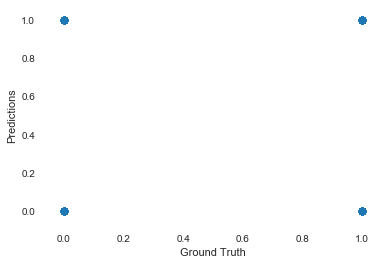

In [417]:
plt.scatter(classisvm_y_test1, RFEclassisvmpredictionsDT, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();